# Linear Regression

$\textbf{1)}$Formula:$$y=a\textbf{x} + b$$
Cost function:$$J(a,b) = \frac{1}{2N}\sum_{i=0}^{N}(y_i-ax_i-b)^2$$

$\textbf{2)}$ Termination criterion is number of iteration, here I set 50000. 

In [23]:
import numpy as np
import matplotlib.pylab as pl
import random

def gradient(X, y, a, b):
    #y = aX + b
    #loss = 1/2N * sum((y - aX - b)^2)
    da, db = 0.0, 0.0
    N = len(X)
    db = np.sum(-1.0/N * (y - a*X - b))
    da = np.sum(-1.0/N * (y - a*X - b) * X)
    return da, db

def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss

def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]))
    da /= N
    return loss, da, db

def opt(X, y, a, b, learning_rate, num_iter, browse = True):
#     a_update, b_update = 0.0, 0.0
    for i in range(num_iter):
        da, db = gradient(X, y, a, b)
        #update a, b
        a -= learning_rate * da
        b -= learning_rate * db
        if browse:
            print 'iter {0}:loss={1}'.format(i,loss(X, y, a, b))
    return a, b
def test(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0], data[:,1]
    X /=10.0
    y /=100.0
    return X, y

def linear_regression(PATH):
    #hyperparameter
    learning_rate = 0.001
    a_init = random.random()
    b_init = random.random()
    num_iter = 50000
    print a_init, b_init
    #load data
    X, y = load_data(PATH)
    
    #train
    print 'Train start...'
    a, b = opt(X, y, a_init, b_init, learning_rate, num_iter)
    print 'Result:\n a = {0}\n b = {1}\n loss = {2}\n'.format(a, b, loss(X, y, a, b))
    
    #plot
    y_p = a*X + b
    pl.plot(X, y, 'o')
    pl.plot(X, y_p, 'k-')
    pl.show()
    return a, b

0.44711935903 0.90876433752
Train start...
iter 0:loss=1.82467033909
iter 1:loss=1.81769175944
iter 2:loss=1.81115299311
iter 3:loss=1.80502462952
iter 4:loss=1.79927922526
iter 5:loss=1.79389117259
iter 6:loss=1.78883657657
iter 7:loss=1.78409314055
iter 8:loss=1.77964005926
iter 9:loss=1.77545791901
iter 10:loss=1.77152860467
iter 11:loss=1.76783521278
iter 12:loss=1.7643619705
iter 13:loss=1.76109416002
iter 14:loss=1.75801804793
iter 15:loss=1.75512081945
iter 16:loss=1.75239051692
iter 17:loss=1.74981598252
iter 18:loss=1.74738680472
iter 19:loss=1.74509326843
iter 20:loss=1.74292630834
iter 21:loss=1.74087746551
iter 22:loss=1.7389388468
iter 23:loss=1.73710308701
iter 24:loss=1.73536331359
iter 25:loss=1.73371311368
iter 26:loss=1.73214650334
iter 27:loss=1.73065789888
iter 28:loss=1.72924209012
iter 29:loss=1.72789421535
iter 30:loss=1.72660973803
iter 31:loss=1.72538442509
iter 32:loss=1.72421432658
iter 33:loss=1.72309575675
iter 34:loss=1.72202527638
iter 35:loss=1.720999676

iter 576:loss=1.51083613364
iter 577:loss=1.51049104629
iter 578:loss=1.51014605462
iter 579:loss=1.50980115859
iter 580:loss=1.50945635819
iter 581:loss=1.50911165339
iter 582:loss=1.50876704416
iter 583:loss=1.50842253047
iter 584:loss=1.5080781123
iter 585:loss=1.50773378962
iter 586:loss=1.50738956241
iter 587:loss=1.50704543063
iter 588:loss=1.50670139426
iter 589:loss=1.50635745329
iter 590:loss=1.50601360767
iter 591:loss=1.50566985738
iter 592:loss=1.5053262024
iter 593:loss=1.50498264269
iter 594:loss=1.50463917824
iter 595:loss=1.50429580902
iter 596:loss=1.503952535
iter 597:loss=1.50360935615
iter 598:loss=1.50326627245
iter 599:loss=1.50292328387
iter 600:loss=1.50258039039
iter 601:loss=1.50223759197
iter 602:loss=1.5018948886
iter 603:loss=1.50155228024
iter 604:loss=1.50120976687
iter 605:loss=1.50086734847
iter 606:loss=1.500525025
iter 607:loss=1.50018279644
iter 608:loss=1.49984066276
iter 609:loss=1.49949862395
iter 610:loss=1.49915667996
iter 611:loss=1.49881483078

iter 2604:loss=0.975468268774
iter 2605:loss=0.975271614089
iter 2606:loss=0.975075013927
iter 2607:loss=0.974878468273
iter 2608:loss=0.974681977113
iter 2609:loss=0.97448554043
iter 2610:loss=0.974289158209
iter 2611:loss=0.974092830437
iter 2612:loss=0.973896557097
iter 2613:loss=0.973700338175
iter 2614:loss=0.973504173655
iter 2615:loss=0.973308063522
iter 2616:loss=0.973112007761
iter 2617:loss=0.972916006358
iter 2618:loss=0.972720059297
iter 2619:loss=0.972524166563
iter 2620:loss=0.97232832814
iter 2621:loss=0.972132544015
iter 2622:loss=0.971936814172
iter 2623:loss=0.971741138595
iter 2624:loss=0.97154551727
iter 2625:loss=0.971349950182
iter 2626:loss=0.971154437315
iter 2627:loss=0.970958978655
iter 2628:loss=0.970763574187
iter 2629:loss=0.970568223896
iter 2630:loss=0.970372927765
iter 2631:loss=0.970177685782
iter 2632:loss=0.96998249793
iter 2633:loss=0.969787364194
iter 2634:loss=0.969592284561
iter 2635:loss=0.969397259013
iter 2636:loss=0.969202287537
iter 2637:loss

iter 4608:loss=0.673077524013
iter 4609:loss=0.672964708249
iter 4610:loss=0.672851923764
iter 4611:loss=0.672739170548
iter 4612:loss=0.672626448594
iter 4613:loss=0.672513757892
iter 4614:loss=0.672401098434
iter 4615:loss=0.672288470212
iter 4616:loss=0.672175873216
iter 4617:loss=0.672063307438
iter 4618:loss=0.671950772869
iter 4619:loss=0.671838269501
iter 4620:loss=0.671725797325
iter 4621:loss=0.671613356332
iter 4622:loss=0.671500946514
iter 4623:loss=0.671388567861
iter 4624:loss=0.671276220367
iter 4625:loss=0.67116390402
iter 4626:loss=0.671051618814
iter 4627:loss=0.67093936474
iter 4628:loss=0.670827141788
iter 4629:loss=0.670714949951
iter 4630:loss=0.670602789219
iter 4631:loss=0.670490659584
iter 4632:loss=0.670378561038
iter 4633:loss=0.670266493571
iter 4634:loss=0.670154457175
iter 4635:loss=0.670042451842
iter 4636:loss=0.669930477563
iter 4637:loss=0.669818534329
iter 4638:loss=0.669706622131
iter 4639:loss=0.669594740962
iter 4640:loss=0.669482890812
iter 4641:lo

iter 6599:loss=0.500446675425
iter 6600:loss=0.500381722184
iter 6601:loss=0.500316786952
iter 6602:loss=0.500251869724
iter 6603:loss=0.500186970494
iter 6604:loss=0.500122089258
iter 6605:loss=0.50005722601
iter 6606:loss=0.499992380745
iter 6607:loss=0.49992755346
iter 6608:loss=0.499862744148
iter 6609:loss=0.499797952804
iter 6610:loss=0.499733179424
iter 6611:loss=0.499668424003
iter 6612:loss=0.499603686535
iter 6613:loss=0.499538967017
iter 6614:loss=0.499474265441
iter 6615:loss=0.499409581805
iter 6616:loss=0.499344916102
iter 6617:loss=0.499280268329
iter 6618:loss=0.499215638479
iter 6619:loss=0.499151026547
iter 6620:loss=0.49908643253
iter 6621:loss=0.499021856422
iter 6622:loss=0.498957298218
iter 6623:loss=0.498892757912
iter 6624:loss=0.498828235501
iter 6625:loss=0.498763730979
iter 6626:loss=0.49869924434
iter 6627:loss=0.498634775581
iter 6628:loss=0.498570324697
iter 6629:loss=0.498505891681
iter 6630:loss=0.49844147653
iter 6631:loss=0.498377079238
iter 6632:loss=

iter 8604:loss=0.400532521235
iter 8605:loss=0.400495269553
iter 8606:loss=0.400458028199
iter 8607:loss=0.400420797171
iter 8608:loss=0.400383576464
iter 8609:loss=0.400346366078
iter 8610:loss=0.400309166008
iter 8611:loss=0.400271976252
iter 8612:loss=0.400234796807
iter 8613:loss=0.40019762767
iter 8614:loss=0.400160468838
iter 8615:loss=0.400123320309
iter 8616:loss=0.400086182079
iter 8617:loss=0.400049054146
iter 8618:loss=0.400011936507
iter 8619:loss=0.399974829159
iter 8620:loss=0.399937732099
iter 8621:loss=0.399900645325
iter 8622:loss=0.399863568832
iter 8623:loss=0.39982650262
iter 8624:loss=0.399789446684
iter 8625:loss=0.399752401022
iter 8626:loss=0.399715365631
iter 8627:loss=0.399678340508
iter 8628:loss=0.399641325651
iter 8629:loss=0.399604321056
iter 8630:loss=0.399567326721
iter 8631:loss=0.399530342642
iter 8632:loss=0.399493368818
iter 8633:loss=0.399456405244
iter 8634:loss=0.399419451919
iter 8635:loss=0.39938250884
iter 8636:loss=0.399345576003
iter 8637:los

iter 10623:loss=0.34293165433
iter 10624:loss=0.342910372696
iter 10625:loss=0.342889096961
iter 10626:loss=0.342867827126
iter 10627:loss=0.342846563188
iter 10628:loss=0.342825305145
iter 10629:loss=0.342804052996
iter 10630:loss=0.342782806739
iter 10631:loss=0.342761566373
iter 10632:loss=0.342740331896
iter 10633:loss=0.342719103306
iter 10634:loss=0.342697880602
iter 10635:loss=0.342676663782
iter 10636:loss=0.342655452844
iter 10637:loss=0.342634247788
iter 10638:loss=0.34261304861
iter 10639:loss=0.34259185531
iter 10640:loss=0.342570667886
iter 10641:loss=0.342549486336
iter 10642:loss=0.342528310659
iter 10643:loss=0.342507140853
iter 10644:loss=0.342485976916
iter 10645:loss=0.342464818847
iter 10646:loss=0.342443666644
iter 10647:loss=0.342422520306
iter 10648:loss=0.34240137983
iter 10649:loss=0.342380245216
iter 10650:loss=0.342359116462
iter 10651:loss=0.342337993565
iter 10652:loss=0.342316876525
iter 10653:loss=0.34229576534
iter 10654:loss=0.342274660008
iter 10655:lo

iter 12587:loss=0.310698579268
iter 12588:loss=0.310686234369
iter 12589:loss=0.310673892893
iter 12590:loss=0.310661554839
iter 12591:loss=0.310649220205
iter 12592:loss=0.310636888992
iter 12593:loss=0.310624561197
iter 12594:loss=0.31061223682
iter 12595:loss=0.31059991586
iter 12596:loss=0.310587598316
iter 12597:loss=0.310575284187
iter 12598:loss=0.310562973473
iter 12599:loss=0.310550666171
iter 12600:loss=0.310538362282
iter 12601:loss=0.310526061804
iter 12602:loss=0.310513764736
iter 12603:loss=0.310501471078
iter 12604:loss=0.310489180828
iter 12605:loss=0.310476893986
iter 12606:loss=0.31046461055
iter 12607:loss=0.31045233052
iter 12608:loss=0.310440053895
iter 12609:loss=0.310427780673
iter 12610:loss=0.310415510855
iter 12611:loss=0.310403244438
iter 12612:loss=0.310390981422
iter 12613:loss=0.310378721806
iter 12614:loss=0.310366465588
iter 12615:loss=0.31035421277
iter 12616:loss=0.310341963348
iter 12617:loss=0.310329717322
iter 12618:loss=0.310317474692
iter 12619:lo

iter 14610:loss=0.291581930886
iter 14611:loss=0.291574886147
iter 14612:loss=0.291567843361
iter 14613:loss=0.291560802528
iter 14614:loss=0.291553763646
iter 14615:loss=0.291546726717
iter 14616:loss=0.291539691738
iter 14617:loss=0.29153265871
iter 14618:loss=0.291525627631
iter 14619:loss=0.291518598502
iter 14620:loss=0.291511571322
iter 14621:loss=0.291504546091
iter 14622:loss=0.291497522807
iter 14623:loss=0.29149050147
iter 14624:loss=0.29148348208
iter 14625:loss=0.291476464636
iter 14626:loss=0.291469449137
iter 14627:loss=0.291462435584
iter 14628:loss=0.291455423976
iter 14629:loss=0.291448414311
iter 14630:loss=0.29144140659
iter 14631:loss=0.291434400811
iter 14632:loss=0.291427396975
iter 14633:loss=0.291420395081
iter 14634:loss=0.291413395128
iter 14635:loss=0.291406397116
iter 14636:loss=0.291399401045
iter 14637:loss=0.291392406912
iter 14638:loss=0.291385414719
iter 14639:loss=0.291378424465
iter 14640:loss=0.291371436149
iter 14641:loss=0.29136444977
iter 14642:lo

iter 16594:loss=0.28083048395
iter 16595:loss=0.280826420089
iter 16596:loss=0.280822357353
iter 16597:loss=0.280818295745
iter 16598:loss=0.280814235262
iter 16599:loss=0.280810175905
iter 16600:loss=0.280806117674
iter 16601:loss=0.280802060568
iter 16602:loss=0.280798004586
iter 16603:loss=0.280793949729
iter 16604:loss=0.280789895997
iter 16605:loss=0.280785843388
iter 16606:loss=0.280781791903
iter 16607:loss=0.280777741541
iter 16608:loss=0.280773692302
iter 16609:loss=0.280769644186
iter 16610:loss=0.280765597192
iter 16611:loss=0.28076155132
iter 16612:loss=0.28075750657
iter 16613:loss=0.280753462942
iter 16614:loss=0.280749420434
iter 16615:loss=0.280745379047
iter 16616:loss=0.280741338781
iter 16617:loss=0.280737299635
iter 16618:loss=0.280733261609
iter 16619:loss=0.280729224702
iter 16620:loss=0.280725188915
iter 16621:loss=0.280721154246
iter 16622:loss=0.280717120697
iter 16623:loss=0.280713088265
iter 16624:loss=0.280709056952
iter 16625:loss=0.280705026756
iter 16626:

iter 18579:loss=0.274626008653
iter 18580:loss=0.274623665005
iter 18581:loss=0.274621322006
iter 18582:loss=0.274618979656
iter 18583:loss=0.274616637956
iter 18584:loss=0.274614296905
iter 18585:loss=0.274611956504
iter 18586:loss=0.274609616751
iter 18587:loss=0.274607277647
iter 18588:loss=0.274604939191
iter 18589:loss=0.274602601384
iter 18590:loss=0.274600264225
iter 18591:loss=0.274597927714
iter 18592:loss=0.274595591851
iter 18593:loss=0.274593256635
iter 18594:loss=0.274590922067
iter 18595:loss=0.274588588146
iter 18596:loss=0.274586254872
iter 18597:loss=0.274583922245
iter 18598:loss=0.274581590265
iter 18599:loss=0.274579258931
iter 18600:loss=0.274576928244
iter 18601:loss=0.274574598203
iter 18602:loss=0.274572268808
iter 18603:loss=0.274569940059
iter 18604:loss=0.274567611955
iter 18605:loss=0.274565284497
iter 18606:loss=0.274562957684
iter 18607:loss=0.274560631517
iter 18608:loss=0.274558305994
iter 18609:loss=0.274555981116
iter 18610:loss=0.274553656882
iter 186

iter 20608:loss=0.270988740757
iter 20609:loss=0.270987405554
iter 20610:loss=0.270986070721
iter 20611:loss=0.270984736258
iter 20612:loss=0.270983402165
iter 20613:loss=0.270982068442
iter 20614:loss=0.270980735088
iter 20615:loss=0.270979402105
iter 20616:loss=0.270978069491
iter 20617:loss=0.270976737246
iter 20618:loss=0.270975405371
iter 20619:loss=0.270974073865
iter 20620:loss=0.270972742728
iter 20621:loss=0.270971411961
iter 20622:loss=0.270970081562
iter 20623:loss=0.270968751532
iter 20624:loss=0.270967421871
iter 20625:loss=0.270966092579
iter 20626:loss=0.270964763655
iter 20627:loss=0.270963435099
iter 20628:loss=0.270962106912
iter 20629:loss=0.270960779093
iter 20630:loss=0.270959451642
iter 20631:loss=0.27095812456
iter 20632:loss=0.270956797845
iter 20633:loss=0.270955471498
iter 20634:loss=0.270954145519
iter 20635:loss=0.270952819907
iter 20636:loss=0.270951494663
iter 20637:loss=0.270950169787
iter 20638:loss=0.270948845278
iter 20639:loss=0.270947521136
iter 2064

iter 22601:loss=0.268944073594
iter 22602:loss=0.268943305282
iter 22603:loss=0.268942537183
iter 22604:loss=0.268941769297
iter 22605:loss=0.268941001624
iter 22606:loss=0.268940234164
iter 22607:loss=0.268939466917
iter 22608:loss=0.268938699882
iter 22609:loss=0.26893793306
iter 22610:loss=0.268937166451
iter 22611:loss=0.268936400054
iter 22612:loss=0.26893563387
iter 22613:loss=0.268934867898
iter 22614:loss=0.268934102138
iter 22615:loss=0.268933336591
iter 22616:loss=0.268932571256
iter 22617:loss=0.268931806133
iter 22618:loss=0.268931041222
iter 22619:loss=0.268930276524
iter 22620:loss=0.268929512037
iter 22621:loss=0.268928747763
iter 22622:loss=0.2689279837
iter 22623:loss=0.268927219849
iter 22624:loss=0.26892645621
iter 22625:loss=0.268925692783
iter 22626:loss=0.268924929567
iter 22627:loss=0.268924166563
iter 22628:loss=0.26892340377
iter 22629:loss=0.268922641189
iter 22630:loss=0.268921878819
iter 22631:loss=0.268921116661
iter 22632:loss=0.268920354714
iter 22633:los

iter 24592:loss=0.267768401632
iter 24593:loss=0.26776795928
iter 24594:loss=0.26776751705
iter 24595:loss=0.267767074942
iter 24596:loss=0.267766632958
iter 24597:loss=0.267766191095
iter 24598:loss=0.267765749356
iter 24599:loss=0.267765307738
iter 24600:loss=0.267764866244
iter 24601:loss=0.267764424871
iter 24602:loss=0.267763983621
iter 24603:loss=0.267763542494
iter 24604:loss=0.267763101488
iter 24605:loss=0.267762660605
iter 24606:loss=0.267762219844
iter 24607:loss=0.267761779206
iter 24608:loss=0.267761338689
iter 24609:loss=0.267760898295
iter 24610:loss=0.267760458022
iter 24611:loss=0.267760017872
iter 24612:loss=0.267759577844
iter 24613:loss=0.267759137938
iter 24614:loss=0.267758698154
iter 24615:loss=0.267758258491
iter 24616:loss=0.267757818951
iter 24617:loss=0.267757379533
iter 24618:loss=0.267756940236
iter 24619:loss=0.267756501061
iter 24620:loss=0.267756062008
iter 24621:loss=0.267755623076
iter 24622:loss=0.267755184267
iter 24623:loss=0.267754745579
iter 24624

iter 26597:loss=0.267087953899
iter 26598:loss=0.267087700203
iter 26599:loss=0.267087446577
iter 26600:loss=0.267087193022
iter 26601:loss=0.267086939537
iter 26602:loss=0.267086686122
iter 26603:loss=0.267086432777
iter 26604:loss=0.267086179503
iter 26605:loss=0.267085926299
iter 26606:loss=0.267085673165
iter 26607:loss=0.267085420101
iter 26608:loss=0.267085167108
iter 26609:loss=0.267084914185
iter 26610:loss=0.267084661331
iter 26611:loss=0.267084408548
iter 26612:loss=0.267084155835
iter 26613:loss=0.267083903192
iter 26614:loss=0.267083650619
iter 26615:loss=0.267083398116
iter 26616:loss=0.267083145683
iter 26617:loss=0.267082893321
iter 26618:loss=0.267082641028
iter 26619:loss=0.267082388805
iter 26620:loss=0.267082136651
iter 26621:loss=0.267081884568
iter 26622:loss=0.267081632555
iter 26623:loss=0.267081380612
iter 26624:loss=0.267081128738
iter 26625:loss=0.267080876934
iter 26626:loss=0.2670806252
iter 26627:loss=0.267080373536
iter 26628:loss=0.267080121942
iter 26629

iter 28603:loss=0.266697561163
iter 28604:loss=0.266697415705
iter 28605:loss=0.266697270287
iter 28606:loss=0.26669712491
iter 28607:loss=0.266696979572
iter 28608:loss=0.266696834275
iter 28609:loss=0.266696689019
iter 28610:loss=0.266696543802
iter 28611:loss=0.266696398626
iter 28612:loss=0.26669625349
iter 28613:loss=0.266696108395
iter 28614:loss=0.266695963339
iter 28615:loss=0.266695818324
iter 28616:loss=0.266695673349
iter 28617:loss=0.266695528414
iter 28618:loss=0.26669538352
iter 28619:loss=0.266695238665
iter 28620:loss=0.266695093851
iter 28621:loss=0.266694949077
iter 28622:loss=0.266694804343
iter 28623:loss=0.266694659649
iter 28624:loss=0.266694514995
iter 28625:loss=0.266694370381
iter 28626:loss=0.266694225808
iter 28627:loss=0.266694081274
iter 28628:loss=0.266693936781
iter 28629:loss=0.266693792327
iter 28630:loss=0.266693647914
iter 28631:loss=0.266693503541
iter 28632:loss=0.266693359208
iter 28633:loss=0.266693214914
iter 28634:loss=0.266693070661
iter 28635:

iter 30582:loss=0.266475987551
iter 30583:loss=0.266475903525
iter 30584:loss=0.266475819522
iter 30585:loss=0.266475735543
iter 30586:loss=0.266475651586
iter 30587:loss=0.266475567653
iter 30588:loss=0.266475483744
iter 30589:loss=0.266475399857
iter 30590:loss=0.266475315994
iter 30591:loss=0.266475232154
iter 30592:loss=0.266475148337
iter 30593:loss=0.266475064544
iter 30594:loss=0.266474980774
iter 30595:loss=0.266474897027
iter 30596:loss=0.266474813303
iter 30597:loss=0.266474729602
iter 30598:loss=0.266474645925
iter 30599:loss=0.266474562271
iter 30600:loss=0.26647447864
iter 30601:loss=0.266474395032
iter 30602:loss=0.266474311447
iter 30603:loss=0.266474227886
iter 30604:loss=0.266474144348
iter 30605:loss=0.266474060833
iter 30606:loss=0.266473977341
iter 30607:loss=0.266473893872
iter 30608:loss=0.266473810426
iter 30609:loss=0.266473727004
iter 30610:loss=0.266473643604
iter 30611:loss=0.266473560228
iter 30612:loss=0.266473476875
iter 30613:loss=0.266473393545
iter 3061

iter 32595:loss=0.266346349405
iter 32596:loss=0.266346301321
iter 32597:loss=0.266346253251
iter 32598:loss=0.266346205194
iter 32599:loss=0.266346157151
iter 32600:loss=0.26634610912
iter 32601:loss=0.266346061104
iter 32602:loss=0.2663460131
iter 32603:loss=0.26634596511
iter 32604:loss=0.266345917133
iter 32605:loss=0.266345869169
iter 32606:loss=0.266345821219
iter 32607:loss=0.266345773282
iter 32608:loss=0.266345725358
iter 32609:loss=0.266345677447
iter 32610:loss=0.26634562955
iter 32611:loss=0.266345581666
iter 32612:loss=0.266345533796
iter 32613:loss=0.266345485938
iter 32614:loss=0.266345438094
iter 32615:loss=0.266345390263
iter 32616:loss=0.266345342446
iter 32617:loss=0.266345294641
iter 32618:loss=0.26634524685
iter 32619:loss=0.266345199073
iter 32620:loss=0.266345151308
iter 32621:loss=0.266345103557
iter 32622:loss=0.266345055819
iter 32623:loss=0.266345008094
iter 32624:loss=0.266344960382
iter 32625:loss=0.266344912684
iter 32626:loss=0.266344864999
iter 32627:los

iter 34600:loss=0.266272385083
iter 34601:loss=0.266272357506
iter 34602:loss=0.266272329937
iter 34603:loss=0.266272302376
iter 34604:loss=0.266272274822
iter 34605:loss=0.266272247276
iter 34606:loss=0.266272219738
iter 34607:loss=0.266272192207
iter 34608:loss=0.266272164684
iter 34609:loss=0.266272137168
iter 34610:loss=0.26627210966
iter 34611:loss=0.26627208216
iter 34612:loss=0.266272054667
iter 34613:loss=0.266272027182
iter 34614:loss=0.266271999705
iter 34615:loss=0.266271972235
iter 34616:loss=0.266271944773
iter 34617:loss=0.266271917319
iter 34618:loss=0.266271889872
iter 34619:loss=0.266271862432
iter 34620:loss=0.266271835001
iter 34621:loss=0.266271807576
iter 34622:loss=0.26627178016
iter 34623:loss=0.266271752751
iter 34624:loss=0.26627172535
iter 34625:loss=0.266271697956
iter 34626:loss=0.26627167057
iter 34627:loss=0.266271643191
iter 34628:loss=0.26627161582
iter 34629:loss=0.266271588457
iter 34630:loss=0.266271561101
iter 34631:loss=0.266271533753
iter 34632:los

iter 36612:loss=0.26622985479
iter 36613:loss=0.266229839005
iter 36614:loss=0.266229823224
iter 36615:loss=0.266229807448
iter 36616:loss=0.266229791676
iter 36617:loss=0.266229775909
iter 36618:loss=0.266229760146
iter 36619:loss=0.266229744387
iter 36620:loss=0.266229728633
iter 36621:loss=0.266229712883
iter 36622:loss=0.266229697137
iter 36623:loss=0.266229681396
iter 36624:loss=0.266229665659
iter 36625:loss=0.266229649926
iter 36626:loss=0.266229634198
iter 36627:loss=0.266229618475
iter 36628:loss=0.266229602755
iter 36629:loss=0.26622958704
iter 36630:loss=0.266229571329
iter 36631:loss=0.266229555623
iter 36632:loss=0.266229539921
iter 36633:loss=0.266229524223
iter 36634:loss=0.26622950853
iter 36635:loss=0.266229492841
iter 36636:loss=0.266229477156
iter 36637:loss=0.266229461476
iter 36638:loss=0.2662294458
iter 36639:loss=0.266229430129
iter 36640:loss=0.266229414461
iter 36641:loss=0.266229398799
iter 36642:loss=0.26622938314
iter 36643:loss=0.266229367486
iter 36644:los

iter 38596:loss=0.266205764322
iter 38597:loss=0.266205755217
iter 38598:loss=0.266205746113
iter 38599:loss=0.266205737013
iter 38600:loss=0.266205727914
iter 38601:loss=0.266205718819
iter 38602:loss=0.266205709725
iter 38603:loss=0.266205700635
iter 38604:loss=0.266205691547
iter 38605:loss=0.266205682461
iter 38606:loss=0.266205673378
iter 38607:loss=0.266205664297
iter 38608:loss=0.266205655219
iter 38609:loss=0.266205646144
iter 38610:loss=0.266205637071
iter 38611:loss=0.266205628
iter 38612:loss=0.266205618932
iter 38613:loss=0.266205609867
iter 38614:loss=0.266205600804
iter 38615:loss=0.266205591744
iter 38616:loss=0.266205582686
iter 38617:loss=0.26620557363
iter 38618:loss=0.266205564577
iter 38619:loss=0.266205555527
iter 38620:loss=0.266205546479
iter 38621:loss=0.266205537434
iter 38622:loss=0.266205528391
iter 38623:loss=0.26620551935
iter 38624:loss=0.266205510312
iter 38625:loss=0.266205501277
iter 38626:loss=0.266205492244
iter 38627:loss=0.266205483214
iter 38628:lo

iter 40614:loss=0.2661916896
iter 40615:loss=0.266191684396
iter 40616:loss=0.266191679194
iter 40617:loss=0.266191673993
iter 40618:loss=0.266191668794
iter 40619:loss=0.266191663596
iter 40620:loss=0.2661916584
iter 40621:loss=0.266191653205
iter 40622:loss=0.266191648012
iter 40623:loss=0.26619164282
iter 40624:loss=0.266191637629
iter 40625:loss=0.26619163244
iter 40626:loss=0.266191627252
iter 40627:loss=0.266191622066
iter 40628:loss=0.266191616881
iter 40629:loss=0.266191611698
iter 40630:loss=0.266191606516
iter 40631:loss=0.266191601336
iter 40632:loss=0.266191596157
iter 40633:loss=0.266191590979
iter 40634:loss=0.266191585803
iter 40635:loss=0.266191580628
iter 40636:loss=0.266191575455
iter 40637:loss=0.266191570283
iter 40638:loss=0.266191565113
iter 40639:loss=0.266191559944
iter 40640:loss=0.266191554776
iter 40641:loss=0.26619154961
iter 40642:loss=0.266191544445
iter 40643:loss=0.266191539282
iter 40644:loss=0.26619153412
iter 40645:loss=0.26619152896
iter 40646:loss=0

iter 42602:loss=0.266183736167
iter 42603:loss=0.266183733168
iter 42604:loss=0.266183730171
iter 42605:loss=0.266183727174
iter 42606:loss=0.266183724178
iter 42607:loss=0.266183721183
iter 42608:loss=0.266183718189
iter 42609:loss=0.266183715195
iter 42610:loss=0.266183712203
iter 42611:loss=0.266183709211
iter 42612:loss=0.26618370622
iter 42613:loss=0.26618370323
iter 42614:loss=0.266183700241
iter 42615:loss=0.266183697252
iter 42616:loss=0.266183694265
iter 42617:loss=0.266183691278
iter 42618:loss=0.266183688292
iter 42619:loss=0.266183685307
iter 42620:loss=0.266183682322
iter 42621:loss=0.266183679339
iter 42622:loss=0.266183676356
iter 42623:loss=0.266183673375
iter 42624:loss=0.266183670394
iter 42625:loss=0.266183667413
iter 42626:loss=0.266183664434
iter 42627:loss=0.266183661456
iter 42628:loss=0.266183658478
iter 42629:loss=0.266183655501
iter 42630:loss=0.266183652525
iter 42631:loss=0.26618364955
iter 42632:loss=0.266183646575
iter 42633:loss=0.266183643602
iter 42634:

iter 44590:loss=0.266179153197
iter 44591:loss=0.26617915147
iter 44592:loss=0.266179149742
iter 44593:loss=0.266179148016
iter 44594:loss=0.266179146289
iter 44595:loss=0.266179144563
iter 44596:loss=0.266179142838
iter 44597:loss=0.266179141113
iter 44598:loss=0.266179139389
iter 44599:loss=0.266179137665
iter 44600:loss=0.266179135941
iter 44601:loss=0.266179134218
iter 44602:loss=0.266179132496
iter 44603:loss=0.266179130774
iter 44604:loss=0.266179129052
iter 44605:loss=0.266179127331
iter 44606:loss=0.266179125611
iter 44607:loss=0.266179123891
iter 44608:loss=0.266179122171
iter 44609:loss=0.266179120452
iter 44610:loss=0.266179118733
iter 44611:loss=0.266179117015
iter 44612:loss=0.266179115297
iter 44613:loss=0.26617911358
iter 44614:loss=0.266179111863
iter 44615:loss=0.266179110147
iter 44616:loss=0.266179108431
iter 44617:loss=0.266179106716
iter 44618:loss=0.266179105001
iter 44619:loss=0.266179103287
iter 44620:loss=0.266179101573
iter 44621:loss=0.266179099859
iter 44622

iter 46602:loss=0.266176488557
iter 46603:loss=0.266176487568
iter 46604:loss=0.266176486579
iter 46605:loss=0.266176485591
iter 46606:loss=0.266176484603
iter 46607:loss=0.266176483615
iter 46608:loss=0.266176482627
iter 46609:loss=0.26617648164
iter 46610:loss=0.266176480653
iter 46611:loss=0.266176479666
iter 46612:loss=0.26617647868
iter 46613:loss=0.266176477693
iter 46614:loss=0.266176476707
iter 46615:loss=0.266176475722
iter 46616:loss=0.266176474736
iter 46617:loss=0.266176473751
iter 46618:loss=0.266176472766
iter 46619:loss=0.266176471782
iter 46620:loss=0.266176470797
iter 46621:loss=0.266176469813
iter 46622:loss=0.26617646883
iter 46623:loss=0.266176467846
iter 46624:loss=0.266176466863
iter 46625:loss=0.26617646588
iter 46626:loss=0.266176464897
iter 46627:loss=0.266176463915
iter 46628:loss=0.266176462933
iter 46629:loss=0.266176461951
iter 46630:loss=0.266176460969
iter 46631:loss=0.266176459988
iter 46632:loss=0.266176459007
iter 46633:loss=0.266176458026
iter 46634:l

iter 48612:loss=0.266174964441
iter 48613:loss=0.266174963874
iter 48614:loss=0.266174963308
iter 48615:loss=0.266174962742
iter 48616:loss=0.266174962176
iter 48617:loss=0.26617496161
iter 48618:loss=0.266174961045
iter 48619:loss=0.266174960479
iter 48620:loss=0.266174959914
iter 48621:loss=0.266174959349
iter 48622:loss=0.266174958784
iter 48623:loss=0.266174958219
iter 48624:loss=0.266174957654
iter 48625:loss=0.26617495709
iter 48626:loss=0.266174956525
iter 48627:loss=0.266174955961
iter 48628:loss=0.266174955397
iter 48629:loss=0.266174954833
iter 48630:loss=0.266174954269
iter 48631:loss=0.266174953706
iter 48632:loss=0.266174953142
iter 48633:loss=0.266174952579
iter 48634:loss=0.266174952016
iter 48635:loss=0.266174951453
iter 48636:loss=0.26617495089
iter 48637:loss=0.266174950328
iter 48638:loss=0.266174949765
iter 48639:loss=0.266174949203
iter 48640:loss=0.266174948641
iter 48641:loss=0.266174948079
iter 48642:loss=0.266174947517
iter 48643:loss=0.266174946955
iter 48644:

iter 49576:loss=0.266174485248
iter 49577:loss=0.266174484814
iter 49578:loss=0.266174484381
iter 49579:loss=0.266174483948
iter 49580:loss=0.266174483514
iter 49581:loss=0.266174483081
iter 49582:loss=0.266174482648
iter 49583:loss=0.266174482216
iter 49584:loss=0.266174481783
iter 49585:loss=0.26617448135
iter 49586:loss=0.266174480918
iter 49587:loss=0.266174480485
iter 49588:loss=0.266174480053
iter 49589:loss=0.266174479621
iter 49590:loss=0.266174479189
iter 49591:loss=0.266174478757
iter 49592:loss=0.266174478326
iter 49593:loss=0.266174477894
iter 49594:loss=0.266174477462
iter 49595:loss=0.266174477031
iter 49596:loss=0.2661744766
iter 49597:loss=0.266174476169
iter 49598:loss=0.266174475738
iter 49599:loss=0.266174475307
iter 49600:loss=0.266174474876
iter 49601:loss=0.266174474445
iter 49602:loss=0.266174474015
iter 49603:loss=0.266174473584
iter 49604:loss=0.266174473154
iter 49605:loss=0.266174472724
iter 49606:loss=0.266174472294
iter 49607:loss=0.266174471864
iter 49608:

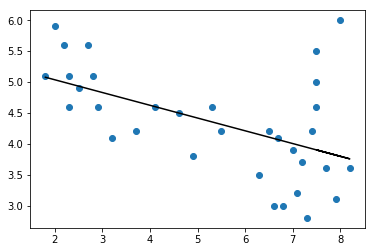

In [2]:
if __name__ == '__main__':
    #data path
    PATH = '4-data.txt'
    
    linear_regression(PATH)

0.16054525489 0.707471829362
Train start...
iter 0:loss=4.23019008332
iter 1:loss=4.08504937733
iter 2:loss=3.94895710758
iter 3:loss=3.82134750784
iter 4:loss=3.70169018777
iter 5:loss=3.58948792087
iter 6:loss=3.48427457094
iter 7:loss=3.385613148
iter 8:loss=3.2930939859
iter 9:loss=3.20633303381
iter 10:loss=3.12497025458
iter 11:loss=3.04866812323
iter 12:loss=2.9771102193
iter 13:loss=2.90999990726
iter 14:loss=2.84705909942
iter 15:loss=2.78802709616
iter 16:loss=2.73265949871
iter 17:loss=2.68072718989
iter 18:loss=2.63201537864
iter 19:loss=2.58632270417
iter 20:loss=2.54346039626
iter 21:loss=2.503251488
iter 22:loss=2.46553007772
iter 23:loss=2.43014063716
iter 24:loss=2.3969373628
iter 25:loss=2.36578356785
iter 26:loss=2.33655111217
iter 27:loss=2.30911986787
iter 28:loss=2.28337721833
iter 29:loss=2.25921758858
iter 30:loss=2.23654200492
iter 31:loss=2.21525768225
iter 32:loss=2.19527763706
iter 33:loss=2.17652032466
iter 34:loss=2.15890929917
iter 35:loss=2.14237289463
i

iter 733:loss=1.63342985713
iter 734:loss=1.63308718795
iter 735:loss=1.63274462616
iter 736:loss=1.63240217174
iter 737:loss=1.63205982465
iter 738:loss=1.63171758485
iter 739:loss=1.63137545232
iter 740:loss=1.63103342701
iter 741:loss=1.6306915089
iter 742:loss=1.63034969796
iter 743:loss=1.63000799414
iter 744:loss=1.62966639742
iter 745:loss=1.62932490776
iter 746:loss=1.62898352512
iter 747:loss=1.62864224948
iter 748:loss=1.62830108081
iter 749:loss=1.62796001905
iter 750:loss=1.6276190642
iter 751:loss=1.6272782162
iter 752:loss=1.62693747503
iter 753:loss=1.62659684065
iter 754:loss=1.62625631303
iter 755:loss=1.62591589214
iter 756:loss=1.62557557794
iter 757:loss=1.62523537041
iter 758:loss=1.62489526949
iter 759:loss=1.62455527517
iter 760:loss=1.62421538741
iter 761:loss=1.62387560618
iter 762:loss=1.62353593143
iter 763:loss=1.62319636315
iter 764:loss=1.62285690129
iter 765:loss=1.62251754582
iter 766:loss=1.62217829672
iter 767:loss=1.62183915394
iter 768:loss=1.6215001

iter 2706:loss=1.12914946929
iter 2707:loss=1.12896484892
iter 2708:loss=1.12878028641
iter 2709:loss=1.12859578175
iter 2710:loss=1.12841133492
iter 2711:loss=1.12822694589
iter 2712:loss=1.12804261465
iter 2713:loss=1.12785834119
iter 2714:loss=1.12767412548
iter 2715:loss=1.1274899675
iter 2716:loss=1.12730586725
iter 2717:loss=1.12712182469
iter 2718:loss=1.12693783982
iter 2719:loss=1.1267539126
iter 2720:loss=1.12657004304
iter 2721:loss=1.1263862311
iter 2722:loss=1.12620247677
iter 2723:loss=1.12601878003
iter 2724:loss=1.12583514086
iter 2725:loss=1.12565155925
iter 2726:loss=1.12546803518
iter 2727:loss=1.12528456863
iter 2728:loss=1.12510115957
iter 2729:loss=1.12491780801
iter 2730:loss=1.1247345139
iter 2731:loss=1.12455127724
iter 2732:loss=1.12436809801
iter 2733:loss=1.1241849762
iter 2734:loss=1.12400191177
iter 2735:loss=1.12381890472
iter 2736:loss=1.12363595503
iter 2737:loss=1.12345306268
iter 2738:loss=1.12327022765
iter 2739:loss=1.12308744992
iter 2740:loss=1.12

iter 4705:loss=0.854881533873
iter 4706:loss=0.854782873068
iter 4707:loss=0.854684243185
iter 4708:loss=0.854585644214
iter 4709:loss=0.854487076146
iter 4710:loss=0.85438853897
iter 4711:loss=0.854290032677
iter 4712:loss=0.854191557257
iter 4713:loss=0.854093112701
iter 4714:loss=0.853994698999
iter 4715:loss=0.853896316141
iter 4716:loss=0.853797964118
iter 4717:loss=0.85369964292
iter 4718:loss=0.853601352537
iter 4719:loss=0.85350309296
iter 4720:loss=0.853404864179
iter 4721:loss=0.853306666184
iter 4722:loss=0.853208498965
iter 4723:loss=0.853110362514
iter 4724:loss=0.85301225682
iter 4725:loss=0.852914181874
iter 4726:loss=0.852816137666
iter 4727:loss=0.852718124187
iter 4728:loss=0.852620141426
iter 4729:loss=0.852522189375
iter 4730:loss=0.852424268023
iter 4731:loss=0.852326377361
iter 4732:loss=0.85222851738
iter 4733:loss=0.852130688069
iter 4734:loss=0.85203288942
iter 4735:loss=0.851935121422
iter 4736:loss=0.851837384065
iter 4737:loss=0.851739677342
iter 4738:loss=0

iter 6702:loss=0.708418723067
iter 6703:loss=0.70836596584
iter 6704:loss=0.708313225147
iter 6705:loss=0.708260500985
iter 6706:loss=0.708207793346
iter 6707:loss=0.708155102227
iter 6708:loss=0.708102427622
iter 6709:loss=0.708049769527
iter 6710:loss=0.707997127935
iter 6711:loss=0.707944502841
iter 6712:loss=0.707891894241
iter 6713:loss=0.70783930213
iter 6714:loss=0.707786726501
iter 6715:loss=0.707734167351
iter 6716:loss=0.707681624673
iter 6717:loss=0.707629098463
iter 6718:loss=0.707576588716
iter 6719:loss=0.707524095425
iter 6720:loss=0.707471618587
iter 6721:loss=0.707419158196
iter 6722:loss=0.707366714247
iter 6723:loss=0.707314286735
iter 6724:loss=0.707261875654
iter 6725:loss=0.707209480999
iter 6726:loss=0.707157102766
iter 6727:loss=0.707104740948
iter 6728:loss=0.707052395542
iter 6729:loss=0.707000066542
iter 6730:loss=0.706947753942
iter 6731:loss=0.706895457738
iter 6732:loss=0.706843177924
iter 6733:loss=0.706790914495
iter 6734:loss=0.706738667447
iter 6735:lo

iter 8684:loss=0.630524395154
iter 8685:loss=0.630496051143
iter 8686:loss=0.630467716016
iter 8687:loss=0.630439389769
iter 8688:loss=0.6304110724
iter 8689:loss=0.630382763906
iter 8690:loss=0.630354464284
iter 8691:loss=0.630326173532
iter 8692:loss=0.630297891647
iter 8693:loss=0.630269618625
iter 8694:loss=0.630241354465
iter 8695:loss=0.630213099163
iter 8696:loss=0.630184852717
iter 8697:loss=0.630156615123
iter 8698:loss=0.63012838638
iter 8699:loss=0.630100166484
iter 8700:loss=0.630071955432
iter 8701:loss=0.630043753223
iter 8702:loss=0.630015559852
iter 8703:loss=0.629987375317
iter 8704:loss=0.629959199616
iter 8705:loss=0.629931032746
iter 8706:loss=0.629902874703
iter 8707:loss=0.629874725486
iter 8708:loss=0.629846585091
iter 8709:loss=0.629818453515
iter 8710:loss=0.629790330757
iter 8711:loss=0.629762216812
iter 8712:loss=0.629734111679
iter 8713:loss=0.629706015355
iter 8714:loss=0.629677927836
iter 8715:loss=0.62964984912
iter 8716:loss=0.629621779205
iter 8717:loss

iter 10643:loss=0.589026949087
iter 10644:loss=0.58901161098
iter 10645:loss=0.58899627768
iter 10646:loss=0.588980949186
iter 10647:loss=0.588965625496
iter 10648:loss=0.588950306608
iter 10649:loss=0.588934992522
iter 10650:loss=0.588919683235
iter 10651:loss=0.588904378747
iter 10652:loss=0.588889079055
iter 10653:loss=0.588873784158
iter 10654:loss=0.588858494055
iter 10655:loss=0.588843208744
iter 10656:loss=0.588827928224
iter 10657:loss=0.588812652493
iter 10658:loss=0.588797381549
iter 10659:loss=0.588782115392
iter 10660:loss=0.588766854019
iter 10661:loss=0.588751597429
iter 10662:loss=0.588736345621
iter 10663:loss=0.588721098594
iter 10664:loss=0.588705856344
iter 10665:loss=0.588690618872
iter 10666:loss=0.588675386176
iter 10667:loss=0.588660158254
iter 10668:loss=0.588644935104
iter 10669:loss=0.588629716726
iter 10670:loss=0.588614503117
iter 10671:loss=0.588599294276
iter 10672:loss=0.588584090202
iter 10673:loss=0.588568890894
iter 10674:loss=0.588553696349
iter 10675

iter 12649:loss=0.566183673713
iter 12650:loss=0.566175495021
iter 12651:loss=0.566167318893
iter 12652:loss=0.566159145326
iter 12653:loss=0.566150974322
iter 12654:loss=0.566142805878
iter 12655:loss=0.566134639995
iter 12656:loss=0.56612647667
iter 12657:loss=0.566118315905
iter 12658:loss=0.566110157697
iter 12659:loss=0.566102002046
iter 12660:loss=0.566093848951
iter 12661:loss=0.566085698411
iter 12662:loss=0.566077550426
iter 12663:loss=0.566069404994
iter 12664:loss=0.566061262115
iter 12665:loss=0.566053121789
iter 12666:loss=0.566044984014
iter 12667:loss=0.566036848789
iter 12668:loss=0.566028716114
iter 12669:loss=0.566020585988
iter 12670:loss=0.56601245841
iter 12671:loss=0.566004333379
iter 12672:loss=0.565996210895
iter 12673:loss=0.565988090956
iter 12674:loss=0.565979973563
iter 12675:loss=0.565971858713
iter 12676:loss=0.565963746407
iter 12677:loss=0.565955636643
iter 12678:loss=0.565947529421
iter 12679:loss=0.56593942474
iter 12680:loss=0.5659313226
iter 12681:lo

iter 14657:loss=0.553994302849
iter 14658:loss=0.553989944483
iter 14659:loss=0.553985587483
iter 14660:loss=0.553981231849
iter 14661:loss=0.55397687758
iter 14662:loss=0.553972524675
iter 14663:loss=0.553968173135
iter 14664:loss=0.553963822959
iter 14665:loss=0.553959474146
iter 14666:loss=0.553955126696
iter 14667:loss=0.553950780609
iter 14668:loss=0.553946435883
iter 14669:loss=0.55394209252
iter 14670:loss=0.553937750517
iter 14671:loss=0.553933409876
iter 14672:loss=0.553929070595
iter 14673:loss=0.553924732674
iter 14674:loss=0.553920396112
iter 14675:loss=0.55391606091
iter 14676:loss=0.553911727066
iter 14677:loss=0.553907394581
iter 14678:loss=0.553903063453
iter 14679:loss=0.553898733683
iter 14680:loss=0.55389440527
iter 14681:loss=0.553890078214
iter 14682:loss=0.553885752514
iter 14683:loss=0.553881428169
iter 14684:loss=0.55387710518
iter 14685:loss=0.553872783546
iter 14686:loss=0.553868463266
iter 14687:loss=0.55386414434
iter 14688:loss=0.553859826768
iter 14689:los

iter 16675:loss=0.547475482689
iter 16676:loss=0.547473167416
iter 16677:loss=0.547470852869
iter 16678:loss=0.547468539048
iter 16679:loss=0.547466225951
iter 16680:loss=0.54746391358
iter 16681:loss=0.547461601933
iter 16682:loss=0.547459291011
iter 16683:loss=0.547456980813
iter 16684:loss=0.547454671339
iter 16685:loss=0.547452362589
iter 16686:loss=0.547450054563
iter 16687:loss=0.54744774726
iter 16688:loss=0.54744544068
iter 16689:loss=0.547443134823
iter 16690:loss=0.547440829688
iter 16691:loss=0.547438525276
iter 16692:loss=0.547436221587
iter 16693:loss=0.547433918619
iter 16694:loss=0.547431616373
iter 16695:loss=0.547429314849
iter 16696:loss=0.547427014046
iter 16697:loss=0.547424713964
iter 16698:loss=0.547422414603
iter 16699:loss=0.547420115963
iter 16700:loss=0.547417818043
iter 16701:loss=0.547415520843
iter 16702:loss=0.547413224363
iter 16703:loss=0.547410928603
iter 16704:loss=0.547408633563
iter 16705:loss=0.547406339242
iter 16706:loss=0.54740404564
iter 16707:l

iter 18679:loss=0.544029782352
iter 18680:loss=0.544028547012
iter 18681:loss=0.544027312059
iter 18682:loss=0.544026077493
iter 18683:loss=0.544024843314
iter 18684:loss=0.544023609522
iter 18685:loss=0.544022376117
iter 18686:loss=0.544021143098
iter 18687:loss=0.544019910466
iter 18688:loss=0.54401867822
iter 18689:loss=0.54401744636
iter 18690:loss=0.544016214886
iter 18691:loss=0.544014983798
iter 18692:loss=0.544013753096
iter 18693:loss=0.54401252278
iter 18694:loss=0.54401129285
iter 18695:loss=0.544010063305
iter 18696:loss=0.544008834145
iter 18697:loss=0.54400760537
iter 18698:loss=0.544006376981
iter 18699:loss=0.544005148976
iter 18700:loss=0.544003921357
iter 18701:loss=0.544002694122
iter 18702:loss=0.544001467272
iter 18703:loss=0.544000240806
iter 18704:loss=0.543999014725
iter 18705:loss=0.543997789028
iter 18706:loss=0.543996563715
iter 18707:loss=0.543995338786
iter 18708:loss=0.543994114242
iter 18709:loss=0.54399289008
iter 18710:loss=0.543991666303
iter 18711:los

iter 20681:loss=0.542192608713
iter 20682:loss=0.54219194917
iter 20683:loss=0.542191289833
iter 20684:loss=0.542190630704
iter 20685:loss=0.54218997178
iter 20686:loss=0.542189313064
iter 20687:loss=0.542188654554
iter 20688:loss=0.54218799625
iter 20689:loss=0.542187338153
iter 20690:loss=0.542186680261
iter 20691:loss=0.542186022576
iter 20692:loss=0.542185365098
iter 20693:loss=0.542184707825
iter 20694:loss=0.542184050758
iter 20695:loss=0.542183393897
iter 20696:loss=0.542182737242
iter 20697:loss=0.542182080793
iter 20698:loss=0.54218142455
iter 20699:loss=0.542180768512
iter 20700:loss=0.54218011268
iter 20701:loss=0.542179457053
iter 20702:loss=0.542178801632
iter 20703:loss=0.542178146416
iter 20704:loss=0.542177491406
iter 20705:loss=0.542176836601
iter 20706:loss=0.542176182001
iter 20707:loss=0.542175527606
iter 20708:loss=0.542174873417
iter 20709:loss=0.542174219432
iter 20710:loss=0.542173565653
iter 20711:loss=0.542172912078
iter 20712:loss=0.542172258708
iter 20713:lo

iter 22694:loss=0.541207881797
iter 22695:loss=0.541207530881
iter 22696:loss=0.541207180076
iter 22697:loss=0.541206829381
iter 22698:loss=0.541206478795
iter 22699:loss=0.54120612832
iter 22700:loss=0.541205777954
iter 22701:loss=0.541205427698
iter 22702:loss=0.541205077552
iter 22703:loss=0.541204727516
iter 22704:loss=0.541204377589
iter 22705:loss=0.541204027772
iter 22706:loss=0.541203678065
iter 22707:loss=0.541203328467
iter 22708:loss=0.541202978979
iter 22709:loss=0.5412026296
iter 22710:loss=0.541202280331
iter 22711:loss=0.541201931171
iter 22712:loss=0.541201582121
iter 22713:loss=0.54120123318
iter 22714:loss=0.541200884349
iter 22715:loss=0.541200535626
iter 22716:loss=0.541200187013
iter 22717:loss=0.54119983851
iter 22718:loss=0.541199490115
iter 22719:loss=0.54119914183
iter 22720:loss=0.541198793654
iter 22721:loss=0.541198445587
iter 22722:loss=0.541198097629
iter 22723:loss=0.541197749781
iter 22724:loss=0.541197402041
iter 22725:loss=0.54119705441
iter 22726:loss

iter 24685:loss=0.540688072169
iter 24686:loss=0.54068788417
iter 24687:loss=0.54068769623
iter 24688:loss=0.540687508348
iter 24689:loss=0.540687320525
iter 24690:loss=0.540687132762
iter 24691:loss=0.540686945057
iter 24692:loss=0.54068675741
iter 24693:loss=0.540686569823
iter 24694:loss=0.540686382295
iter 24695:loss=0.540686194825
iter 24696:loss=0.540686007414
iter 24697:loss=0.540685820062
iter 24698:loss=0.540685632768
iter 24699:loss=0.540685445533
iter 24700:loss=0.540685258357
iter 24701:loss=0.54068507124
iter 24702:loss=0.540684884181
iter 24703:loss=0.540684697181
iter 24704:loss=0.540684510239
iter 24705:loss=0.540684323356
iter 24706:loss=0.540684136532
iter 24707:loss=0.540683949766
iter 24708:loss=0.540683763058
iter 24709:loss=0.54068357641
iter 24710:loss=0.540683389819
iter 24711:loss=0.540683203287
iter 24712:loss=0.540683016814
iter 24713:loss=0.540682830399
iter 24714:loss=0.540682644042
iter 24715:loss=0.540682457744
iter 24716:loss=0.540682271505
iter 24717:lo

iter 26667:loss=0.540410497219
iter 26668:loss=0.540410396215
iter 26669:loss=0.540410295244
iter 26670:loss=0.540410194304
iter 26671:loss=0.540410093395
iter 26672:loss=0.540409992518
iter 26673:loss=0.540409891673
iter 26674:loss=0.54040979086
iter 26675:loss=0.540409690078
iter 26676:loss=0.540409589327
iter 26677:loss=0.540409488609
iter 26678:loss=0.540409387921
iter 26679:loss=0.540409287266
iter 26680:loss=0.540409186642
iter 26681:loss=0.540409086049
iter 26682:loss=0.540408985488
iter 26683:loss=0.540408884958
iter 26684:loss=0.54040878446
iter 26685:loss=0.540408683994
iter 26686:loss=0.540408583559
iter 26687:loss=0.540408483155
iter 26688:loss=0.540408382783
iter 26689:loss=0.540408282442
iter 26690:loss=0.540408182133
iter 26691:loss=0.540408081856
iter 26692:loss=0.540407981609
iter 26693:loss=0.540407881394
iter 26694:loss=0.540407781211
iter 26695:loss=0.540407681059
iter 26696:loss=0.540407580938
iter 26697:loss=0.540407480849
iter 26698:loss=0.540407380791
iter 26699

iter 28412:loss=0.5402747216
iter 28413:loss=0.540274663151
iter 28414:loss=0.54027460472
iter 28415:loss=0.540274546307
iter 28416:loss=0.540274487913
iter 28417:loss=0.540274429537
iter 28418:loss=0.540274371179
iter 28419:loss=0.540274312839
iter 28420:loss=0.540274254518
iter 28421:loss=0.540274196215
iter 28422:loss=0.540274137931
iter 28423:loss=0.540274079664
iter 28424:loss=0.540274021416
iter 28425:loss=0.540273963186
iter 28426:loss=0.540273904975
iter 28427:loss=0.540273846782
iter 28428:loss=0.540273788606
iter 28429:loss=0.54027373045
iter 28430:loss=0.540273672311
iter 28431:loss=0.540273614191
iter 28432:loss=0.540273556088
iter 28433:loss=0.540273498004
iter 28434:loss=0.540273439939
iter 28435:loss=0.540273381891
iter 28436:loss=0.540273323862
iter 28437:loss=0.54027326585
iter 28438:loss=0.540273207857
iter 28439:loss=0.540273149882
iter 28440:loss=0.540273091926
iter 28441:loss=0.540273033987
iter 28442:loss=0.540272976067
iter 28443:loss=0.540272918165
iter 28444:lo

iter 30208:loss=0.540194438493
iter 30209:loss=0.540194405206
iter 30210:loss=0.540194371929
iter 30211:loss=0.540194338663
iter 30212:loss=0.540194305406
iter 30213:loss=0.540194272161
iter 30214:loss=0.540194238925
iter 30215:loss=0.540194205701
iter 30216:loss=0.540194172486
iter 30217:loss=0.540194139282
iter 30218:loss=0.540194106089
iter 30219:loss=0.540194072905
iter 30220:loss=0.540194039733
iter 30221:loss=0.54019400657
iter 30222:loss=0.540193973418
iter 30223:loss=0.540193940276
iter 30224:loss=0.540193907145
iter 30225:loss=0.540193874024
iter 30226:loss=0.540193840914
iter 30227:loss=0.540193807814
iter 30228:loss=0.540193774724
iter 30229:loss=0.540193741645
iter 30230:loss=0.540193708576
iter 30231:loss=0.540193675517
iter 30232:loss=0.540193642469
iter 30233:loss=0.540193609431
iter 30234:loss=0.540193576403
iter 30235:loss=0.540193543386
iter 30236:loss=0.540193510379
iter 30237:loss=0.540193477383
iter 30238:loss=0.540193444397
iter 30239:loss=0.540193411421
iter 3024

iter 32193:loss=0.540145237109
iter 32194:loss=0.540145219242
iter 32195:loss=0.540145201381
iter 32196:loss=0.540145183525
iter 32197:loss=0.540145165675
iter 32198:loss=0.54014514783
iter 32199:loss=0.540145129991
iter 32200:loss=0.540145112158
iter 32201:loss=0.54014509433
iter 32202:loss=0.540145076508
iter 32203:loss=0.540145058691
iter 32204:loss=0.54014504088
iter 32205:loss=0.540145023075
iter 32206:loss=0.540145005275
iter 32207:loss=0.540144987481
iter 32208:loss=0.540144969692
iter 32209:loss=0.540144951909
iter 32210:loss=0.540144934131
iter 32211:loss=0.540144916359
iter 32212:loss=0.540144898593
iter 32213:loss=0.540144880832
iter 32214:loss=0.540144863077
iter 32215:loss=0.540144845327
iter 32216:loss=0.540144827583
iter 32217:loss=0.540144809844
iter 32218:loss=0.540144792111
iter 32219:loss=0.540144774383
iter 32220:loss=0.540144756662
iter 32221:loss=0.540144738945
iter 32222:loss=0.540144721234
iter 32223:loss=0.540144703529
iter 32224:loss=0.540144685829
iter 32225:

iter 34156:loss=0.540119040078
iter 34157:loss=0.540119030421
iter 34158:loss=0.540119020768
iter 34159:loss=0.540119011118
iter 34160:loss=0.54011900147
iter 34161:loss=0.540118991826
iter 34162:loss=0.540118982185
iter 34163:loss=0.540118972546
iter 34164:loss=0.540118962911
iter 34165:loss=0.540118953279
iter 34166:loss=0.54011894365
iter 34167:loss=0.540118934023
iter 34168:loss=0.5401189244
iter 34169:loss=0.54011891478
iter 34170:loss=0.540118905163
iter 34171:loss=0.540118895549
iter 34172:loss=0.540118885938
iter 34173:loss=0.540118876329
iter 34174:loss=0.540118866724
iter 34175:loss=0.540118857122
iter 34176:loss=0.540118847523
iter 34177:loss=0.540118837927
iter 34178:loss=0.540118828334
iter 34179:loss=0.540118818744
iter 34180:loss=0.540118809157
iter 34181:loss=0.540118799573
iter 34182:loss=0.540118789992
iter 34183:loss=0.540118780414
iter 34184:loss=0.540118770839
iter 34185:loss=0.540118761267
iter 34186:loss=0.540118751698
iter 34187:loss=0.540118742131
iter 34188:lo

iter 36174:loss=0.540104596927
iter 36175:loss=0.540104591797
iter 36176:loss=0.540104586669
iter 36177:loss=0.540104581543
iter 36178:loss=0.540104576418
iter 36179:loss=0.540104571294
iter 36180:loss=0.540104566173
iter 36181:loss=0.540104561053
iter 36182:loss=0.540104555934
iter 36183:loss=0.540104550817
iter 36184:loss=0.540104545702
iter 36185:loss=0.540104540588
iter 36186:loss=0.540104535476
iter 36187:loss=0.540104530366
iter 36188:loss=0.540104525257
iter 36189:loss=0.54010452015
iter 36190:loss=0.540104515044
iter 36191:loss=0.54010450994
iter 36192:loss=0.540104504837
iter 36193:loss=0.540104499736
iter 36194:loss=0.540104494637
iter 36195:loss=0.540104489539
iter 36196:loss=0.540104484443
iter 36197:loss=0.540104479349
iter 36198:loss=0.540104474256
iter 36199:loss=0.540104469165
iter 36200:loss=0.540104464075
iter 36201:loss=0.540104458987
iter 36202:loss=0.5401044539
iter 36203:loss=0.540104448816
iter 36204:loss=0.540104443732
iter 36205:loss=0.54010443865
iter 36206:lo

iter 38158:loss=0.540097017527
iter 38159:loss=0.540097014772
iter 38160:loss=0.540097012019
iter 38161:loss=0.540097009266
iter 38162:loss=0.540097006515
iter 38163:loss=0.540097003764
iter 38164:loss=0.540097001014
iter 38165:loss=0.540096998265
iter 38166:loss=0.540096995517
iter 38167:loss=0.540096992769
iter 38168:loss=0.540096990023
iter 38169:loss=0.540096987277
iter 38170:loss=0.540096984533
iter 38171:loss=0.540096981789
iter 38172:loss=0.540096979046
iter 38173:loss=0.540096976303
iter 38174:loss=0.540096973562
iter 38175:loss=0.540096970822
iter 38176:loss=0.540096968082
iter 38177:loss=0.540096965343
iter 38178:loss=0.540096962605
iter 38179:loss=0.540096959868
iter 38180:loss=0.540096957132
iter 38181:loss=0.540096954397
iter 38182:loss=0.540096951662
iter 38183:loss=0.540096948929
iter 38184:loss=0.540096946196
iter 38185:loss=0.540096943464
iter 38186:loss=0.540096940733
iter 38187:loss=0.540096938003
iter 38188:loss=0.540096935274
iter 38189:loss=0.540096932545
iter 381

iter 40147:loss=0.540092940629
iter 40148:loss=0.540092939152
iter 40149:loss=0.540092937676
iter 40150:loss=0.540092936201
iter 40151:loss=0.540092934726
iter 40152:loss=0.540092933251
iter 40153:loss=0.540092931777
iter 40154:loss=0.540092930303
iter 40155:loss=0.54009292883
iter 40156:loss=0.540092927357
iter 40157:loss=0.540092925885
iter 40158:loss=0.540092924413
iter 40159:loss=0.540092922942
iter 40160:loss=0.540092921471
iter 40161:loss=0.54009292
iter 40162:loss=0.54009291853
iter 40163:loss=0.540092917061
iter 40164:loss=0.540092915592
iter 40165:loss=0.540092914123
iter 40166:loss=0.540092912655
iter 40167:loss=0.540092911187
iter 40168:loss=0.54009290972
iter 40169:loss=0.540092908253
iter 40170:loss=0.540092906787
iter 40171:loss=0.540092905321
iter 40172:loss=0.540092903855
iter 40173:loss=0.54009290239
iter 40174:loss=0.540092900926
iter 40175:loss=0.540092899462
iter 40176:loss=0.540092897998
iter 40177:loss=0.540092896535
iter 40178:loss=0.540092895073
iter 40179:loss=

iter 42148:loss=0.54009074562
iter 42149:loss=0.540090744832
iter 42150:loss=0.540090744043
iter 42151:loss=0.540090743255
iter 42152:loss=0.540090742467
iter 42153:loss=0.54009074168
iter 42154:loss=0.540090740893
iter 42155:loss=0.540090740106
iter 42156:loss=0.540090739319
iter 42157:loss=0.540090738532
iter 42158:loss=0.540090737746
iter 42159:loss=0.54009073696
iter 42160:loss=0.540090736174
iter 42161:loss=0.540090735388
iter 42162:loss=0.540090734603
iter 42163:loss=0.540090733818
iter 42164:loss=0.540090733033
iter 42165:loss=0.540090732249
iter 42166:loss=0.540090731464
iter 42167:loss=0.54009073068
iter 42168:loss=0.540090729896
iter 42169:loss=0.540090729113
iter 42170:loss=0.540090728329
iter 42171:loss=0.540090727546
iter 42172:loss=0.540090726763
iter 42173:loss=0.540090725981
iter 42174:loss=0.540090725198
iter 42175:loss=0.540090724416
iter 42176:loss=0.540090723634
iter 42177:loss=0.540090722853
iter 42178:loss=0.540090722071
iter 42179:loss=0.54009072129
iter 42180:lo

iter 44165:loss=0.540089566624
iter 44166:loss=0.540089566205
iter 44167:loss=0.540089565786
iter 44168:loss=0.540089565368
iter 44169:loss=0.540089564949
iter 44170:loss=0.54008956453
iter 44171:loss=0.540089564112
iter 44172:loss=0.540089563694
iter 44173:loss=0.540089563276
iter 44174:loss=0.540089562858
iter 44175:loss=0.54008956244
iter 44176:loss=0.540089562022
iter 44177:loss=0.540089561605
iter 44178:loss=0.540089561187
iter 44179:loss=0.54008956077
iter 44180:loss=0.540089560353
iter 44181:loss=0.540089559936
iter 44182:loss=0.540089559519
iter 44183:loss=0.540089559102
iter 44184:loss=0.540089558685
iter 44185:loss=0.540089558269
iter 44186:loss=0.540089557852
iter 44187:loss=0.540089557436
iter 44188:loss=0.54008955702
iter 44189:loss=0.540089556604
iter 44190:loss=0.540089556188
iter 44191:loss=0.540089555772
iter 44192:loss=0.540089555357
iter 44193:loss=0.540089554941
iter 44194:loss=0.540089554526
iter 44195:loss=0.540089554111
iter 44196:loss=0.540089553695
iter 44197:l

iter 46148:loss=0.540088947728
iter 46149:loss=0.540088947503
iter 46150:loss=0.540088947278
iter 46151:loss=0.540088947053
iter 46152:loss=0.540088946828
iter 46153:loss=0.540088946603
iter 46154:loss=0.540088946379
iter 46155:loss=0.540088946154
iter 46156:loss=0.54008894593
iter 46157:loss=0.540088945705
iter 46158:loss=0.540088945481
iter 46159:loss=0.540088945256
iter 46160:loss=0.540088945032
iter 46161:loss=0.540088944808
iter 46162:loss=0.540088944584
iter 46163:loss=0.54008894436
iter 46164:loss=0.540088944136
iter 46165:loss=0.540088943912
iter 46166:loss=0.540088943688
iter 46167:loss=0.540088943464
iter 46168:loss=0.54008894324
iter 46169:loss=0.540088943017
iter 46170:loss=0.540088942793
iter 46171:loss=0.54008894257
iter 46172:loss=0.540088942346
iter 46173:loss=0.540088942123
iter 46174:loss=0.5400889419
iter 46175:loss=0.540088941676
iter 46176:loss=0.540088941453
iter 46177:loss=0.54008894123
iter 46178:loss=0.540088941007
iter 46179:loss=0.540088940784
iter 46180:loss

iter 48149:loss=0.540088613158
iter 48150:loss=0.540088613038
iter 48151:loss=0.540088612918
iter 48152:loss=0.540088612798
iter 48153:loss=0.540088612678
iter 48154:loss=0.540088612558
iter 48155:loss=0.540088612438
iter 48156:loss=0.540088612318
iter 48157:loss=0.540088612198
iter 48158:loss=0.540088612078
iter 48159:loss=0.540088611958
iter 48160:loss=0.540088611838
iter 48161:loss=0.540088611718
iter 48162:loss=0.540088611599
iter 48163:loss=0.540088611479
iter 48164:loss=0.540088611359
iter 48165:loss=0.54008861124
iter 48166:loss=0.54008861112
iter 48167:loss=0.540088611
iter 48168:loss=0.540088610881
iter 48169:loss=0.540088610761
iter 48170:loss=0.540088610642
iter 48171:loss=0.540088610523
iter 48172:loss=0.540088610403
iter 48173:loss=0.540088610284
iter 48174:loss=0.540088610165
iter 48175:loss=0.540088610045
iter 48176:loss=0.540088609926
iter 48177:loss=0.540088609807
iter 48178:loss=0.540088609688
iter 48179:loss=0.540088609569
iter 48180:loss=0.54008860945
iter 48181:los

iter 49289:loss=0.540088497931
iter 49290:loss=0.540088497847
iter 49291:loss=0.540088497763
iter 49292:loss=0.540088497679
iter 49293:loss=0.540088497595
iter 49294:loss=0.540088497511
iter 49295:loss=0.540088497427
iter 49296:loss=0.540088497343
iter 49297:loss=0.540088497259
iter 49298:loss=0.540088497175
iter 49299:loss=0.540088497091
iter 49300:loss=0.540088497007
iter 49301:loss=0.540088496924
iter 49302:loss=0.54008849684
iter 49303:loss=0.540088496756
iter 49304:loss=0.540088496672
iter 49305:loss=0.540088496589
iter 49306:loss=0.540088496505
iter 49307:loss=0.540088496421
iter 49308:loss=0.540088496338
iter 49309:loss=0.540088496254
iter 49310:loss=0.540088496171
iter 49311:loss=0.540088496087
iter 49312:loss=0.540088496004
iter 49313:loss=0.54008849592
iter 49314:loss=0.540088495837
iter 49315:loss=0.540088495753
iter 49316:loss=0.54008849567
iter 49317:loss=0.540088495586
iter 49318:loss=0.540088495503
iter 49319:loss=0.54008849542
iter 49320:loss=0.540088495337
iter 49321:l

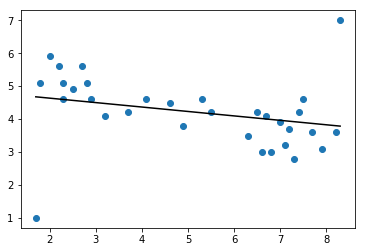

In [24]:
if __name__ == '__main__':
    #data path
    PATH = '5-trainingdata.txt'
    
    linear_regression(PATH)

# Test loss

In [25]:
TEST_PATH = '5-testdata.txt'
a = -0.13471844403
b = 4.90471612363
def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss
def test_old(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
test_loss_old = test_old(TEST_PATH, a, b)
print 'a = '+str(a)
print 'b = '+str(b)
print 'old way loss: '+str(test_loss_old)

a = -0.13471844403
b = 4.90471612363
old way loss: 0.14695543848689624


# Promble 4

0.501632943875 0.506298883822
Train start...
iter 0:loss=2.26739929444
iter 1:loss=2.26128144665
iter 2:loss=2.25550528987
iter 3:loss=2.25004968164
iter 4:loss=2.24489478843
iter 5:loss=2.2400220045
iter 6:loss=2.23541387599
iter 7:loss=2.23105402952
iter 8:loss=2.22692710536
iter 9:loss=2.22301869467
iter 10:loss=2.21931528059
iter 11:loss=2.21580418309
iter 12:loss=2.2124735071
iter 13:loss=2.20931209394
iter 14:loss=2.20630947575
iter 15:loss=2.20345583269
iter 16:loss=2.20074195285
iter 17:loss=2.19815919458
iter 18:loss=2.19569945125
iter 19:loss=2.19335511806
iter 20:loss=2.19111906099
iter 21:loss=2.1889845877
iter 22:loss=2.18694542012
iter 23:loss=2.18499566886
iter 24:loss=2.18312980911
iter 25:loss=2.18134265809
iter 26:loss=2.17962935387
iter 27:loss=2.17798533551
iter 28:loss=2.17640632441
iter 29:loss=2.17488830686
iter 30:loss=2.17342751761
iter 31:loss=2.17202042452
iter 32:loss=2.17066371411
iter 33:loss=2.169354278
iter 34:loss=2.16808920029
iter 35:loss=2.1668657455

iter 960:loss=1.67471449097
iter 961:loss=1.67425998801
iter 962:loss=1.67380561753
iter 963:loss=1.67335137951
iter 964:loss=1.6728972739
iter 965:loss=1.67244330067
iter 966:loss=1.67198945977
iter 967:loss=1.67153575116
iter 968:loss=1.67108217482
iter 969:loss=1.6706287307
iter 970:loss=1.67017541875
iter 971:loss=1.66972223895
iter 972:loss=1.66926919126
iter 973:loss=1.66881627563
iter 974:loss=1.66836349203
iter 975:loss=1.66791084041
iter 976:loss=1.66745832075
iter 977:loss=1.667005933
iter 978:loss=1.66655367712
iter 979:loss=1.66610155308
iter 980:loss=1.66564956084
iter 981:loss=1.66519770035
iter 982:loss=1.66474597158
iter 983:loss=1.66429437449
iter 984:loss=1.66384290905
iter 985:loss=1.66339157521
iter 986:loss=1.66294037294
iter 987:loss=1.6624893022
iter 988:loss=1.66203836294
iter 989:loss=1.66158755514
iter 990:loss=1.66113687875
iter 991:loss=1.66068633373
iter 992:loss=1.66023592005
iter 993:loss=1.65978563767
iter 994:loss=1.65933548655
iter 995:loss=1.658885466

iter 2595:loss=1.0835452096
iter 2596:loss=1.08326303569
iter 2597:loss=1.08298094404
iter 2598:loss=1.08269893462
iter 2599:loss=1.08241700741
iter 2600:loss=1.08213516238
iter 2601:loss=1.08185339951
iter 2602:loss=1.08157171877
iter 2603:loss=1.08129012015
iter 2604:loss=1.08100860361
iter 2605:loss=1.08072716914
iter 2606:loss=1.08044581671
iter 2607:loss=1.08016454629
iter 2608:loss=1.07988335787
iter 2609:loss=1.07960225141
iter 2610:loss=1.0793212269
iter 2611:loss=1.0790402843
iter 2612:loss=1.07875942361
iter 2613:loss=1.07847864478
iter 2614:loss=1.07819794781
iter 2615:loss=1.07791733266
iter 2616:loss=1.07763679931
iter 2617:loss=1.07735634773
iter 2618:loss=1.07707597791
iter 2619:loss=1.07679568982
iter 2620:loss=1.07651548344
iter 2621:loss=1.07623535873
iter 2622:loss=1.07595531569
iter 2623:loss=1.07567535428
iter 2624:loss=1.07539547447
iter 2625:loss=1.07511567626
iter 2626:loss=1.07483595961
iter 2627:loss=1.07455632449
iter 2628:loss=1.0742767709
iter 2629:loss=1.0

iter 4587:loss=0.657118262923
iter 4588:loss=0.656960394788
iter 4589:loss=0.656802572672
iter 4590:loss=0.656644796562
iter 4591:loss=0.656487066444
iter 4592:loss=0.656329382306
iter 4593:loss=0.656171744134
iter 4594:loss=0.656014151914
iter 4595:loss=0.655856605632
iter 4596:loss=0.655699105277
iter 4597:loss=0.655541650834
iter 4598:loss=0.655384242289
iter 4599:loss=0.65522687963
iter 4600:loss=0.655069562843
iter 4601:loss=0.654912291915
iter 4602:loss=0.654755066832
iter 4603:loss=0.654597887581
iter 4604:loss=0.654440754149
iter 4605:loss=0.654283666521
iter 4606:loss=0.654126624686
iter 4607:loss=0.65396962863
iter 4608:loss=0.653812678338
iter 4609:loss=0.653655773798
iter 4610:loss=0.653498914997
iter 4611:loss=0.653342101921
iter 4612:loss=0.653185334557
iter 4613:loss=0.653028612892
iter 4614:loss=0.652871936912
iter 4615:loss=0.652715306603
iter 4616:loss=0.652558721954
iter 4617:loss=0.652402182949
iter 4618:loss=0.652245689576
iter 4619:loss=0.652089241823
iter 4620:lo

iter 6561:loss=0.420138945007
iter 6562:loss=0.42005015763
iter 6563:loss=0.419961396135
iter 6564:loss=0.419872660515
iter 6565:loss=0.419783950761
iter 6566:loss=0.419695266867
iter 6567:loss=0.419606608825
iter 6568:loss=0.419517976627
iter 6569:loss=0.419429370265
iter 6570:loss=0.419340789733
iter 6571:loss=0.419252235023
iter 6572:loss=0.419163706127
iter 6573:loss=0.419075203037
iter 6574:loss=0.418986725747
iter 6575:loss=0.418898274248
iter 6576:loss=0.418809848533
iter 6577:loss=0.418721448595
iter 6578:loss=0.418633074426
iter 6579:loss=0.418544726019
iter 6580:loss=0.418456403365
iter 6581:loss=0.418368106458
iter 6582:loss=0.41827983529
iter 6583:loss=0.418191589854
iter 6584:loss=0.418103370141
iter 6585:loss=0.418015176146
iter 6586:loss=0.417927007859
iter 6587:loss=0.417838865274
iter 6588:loss=0.417750748382
iter 6589:loss=0.417662657178
iter 6590:loss=0.417574591652
iter 6591:loss=0.417486551798
iter 6592:loss=0.417398537608
iter 6593:loss=0.417310549075
iter 6594:lo

iter 8566:loss=0.285317021917
iter 8567:loss=0.285267535863
iter 8568:loss=0.285218064235
iter 8569:loss=0.285168607027
iter 8570:loss=0.285119164237
iter 8571:loss=0.28506973586
iter 8572:loss=0.285020321891
iter 8573:loss=0.284970922327
iter 8574:loss=0.284921537163
iter 8575:loss=0.284872166395
iter 8576:loss=0.284822810018
iter 8577:loss=0.28477346803
iter 8578:loss=0.284724140425
iter 8579:loss=0.284674827199
iter 8580:loss=0.284625528348
iter 8581:loss=0.284576243868
iter 8582:loss=0.284526973755
iter 8583:loss=0.284477718004
iter 8584:loss=0.284428476612
iter 8585:loss=0.284379249574
iter 8586:loss=0.284330036886
iter 8587:loss=0.284280838543
iter 8588:loss=0.284231654542
iter 8589:loss=0.284182484879
iter 8590:loss=0.284133329548
iter 8591:loss=0.284084188547
iter 8592:loss=0.284035061871
iter 8593:loss=0.283985949515
iter 8594:loss=0.283936851476
iter 8595:loss=0.283887767749
iter 8596:loss=0.28383869833
iter 8597:loss=0.283789643216
iter 8598:loss=0.283740602401
iter 8599:los

iter 10569:loss=0.210228588031
iter 10570:loss=0.210200990663
iter 10571:loss=0.21017340134
iter 10572:loss=0.21014582006
iter 10573:loss=0.21011824682
iter 10574:loss=0.210090681617
iter 10575:loss=0.21006312445
iter 10576:loss=0.210035575316
iter 10577:loss=0.210008034212
iter 10578:loss=0.209980501137
iter 10579:loss=0.209952976089
iter 10580:loss=0.209925459063
iter 10581:loss=0.209897950059
iter 10582:loss=0.209870449075
iter 10583:loss=0.209842956106
iter 10584:loss=0.209815471153
iter 10585:loss=0.209787994211
iter 10586:loss=0.209760525279
iter 10587:loss=0.209733064354
iter 10588:loss=0.209705611434
iter 10589:loss=0.209678166517
iter 10590:loss=0.2096507296
iter 10591:loss=0.209623300681
iter 10592:loss=0.209595879758
iter 10593:loss=0.209568466829
iter 10594:loss=0.20954106189
iter 10595:loss=0.20951366494
iter 10596:loss=0.209486275976
iter 10597:loss=0.209458894997
iter 10598:loss=0.209431521999
iter 10599:loss=0.20940415698
iter 10600:loss=0.209376799939
iter 10601:loss=0

iter 12569:loss=0.16839949134
iter 12570:loss=0.168384087382
iter 12571:loss=0.168368687913
iter 12572:loss=0.168353292934
iter 12573:loss=0.168337902442
iter 12574:loss=0.168322516437
iter 12575:loss=0.168307134917
iter 12576:loss=0.168291757881
iter 12577:loss=0.168276385327
iter 12578:loss=0.168261017254
iter 12579:loss=0.168245653661
iter 12580:loss=0.168230294547
iter 12581:loss=0.16821493991
iter 12582:loss=0.168199589749
iter 12583:loss=0.168184244063
iter 12584:loss=0.16816890285
iter 12585:loss=0.168153566109
iter 12586:loss=0.168138233839
iter 12587:loss=0.168122906038
iter 12588:loss=0.168107582706
iter 12589:loss=0.16809226384
iter 12590:loss=0.16807694944
iter 12591:loss=0.168061639504
iter 12592:loss=0.168046334031
iter 12593:loss=0.168031033019
iter 12594:loss=0.168015736468
iter 12595:loss=0.168000444376
iter 12596:loss=0.167985156742
iter 12597:loss=0.167969873564
iter 12598:loss=0.167954594841
iter 12599:loss=0.167939320572
iter 12600:loss=0.167924050755
iter 12601:lo

iter 14581:loss=0.144948830758
iter 14582:loss=0.144940262794
iter 14583:loss=0.144931697328
iter 14584:loss=0.144923134358
iter 14585:loss=0.144914573885
iter 14586:loss=0.144906015908
iter 14587:loss=0.144897460425
iter 14588:loss=0.144888907436
iter 14589:loss=0.14488035694
iter 14590:loss=0.144871808937
iter 14591:loss=0.144863263425
iter 14592:loss=0.144854720405
iter 14593:loss=0.144846179874
iter 14594:loss=0.144837641834
iter 14595:loss=0.144829106282
iter 14596:loss=0.144820573219
iter 14597:loss=0.144812042643
iter 14598:loss=0.144803514554
iter 14599:loss=0.14479498895
iter 14600:loss=0.144786465832
iter 14601:loss=0.144777945199
iter 14602:loss=0.144769427049
iter 14603:loss=0.144760911383
iter 14604:loss=0.144752398198
iter 14605:loss=0.144743887496
iter 14606:loss=0.144735379274
iter 14607:loss=0.144726873532
iter 14608:loss=0.14471837027
iter 14609:loss=0.144709869487
iter 14610:loss=0.144701371182
iter 14611:loss=0.144692875354
iter 14612:loss=0.144684382003
iter 14613:

iter 16584:loss=0.131948097644
iter 16585:loss=0.131943319464
iter 16586:loss=0.131938542678
iter 16587:loss=0.131933767284
iter 16588:loss=0.131928993282
iter 16589:loss=0.131924220671
iter 16590:loss=0.131919449452
iter 16591:loss=0.131914679624
iter 16592:loss=0.131909911186
iter 16593:loss=0.131905144138
iter 16594:loss=0.13190037848
iter 16595:loss=0.131895614211
iter 16596:loss=0.13189085133
iter 16597:loss=0.131886089838
iter 16598:loss=0.131881329735
iter 16599:loss=0.131876571018
iter 16600:loss=0.131871813689
iter 16601:loss=0.131867057747
iter 16602:loss=0.131862303191
iter 16603:loss=0.131857550021
iter 16604:loss=0.131852798237
iter 16605:loss=0.131848047838
iter 16606:loss=0.131843298824
iter 16607:loss=0.131838551193
iter 16608:loss=0.131833804947
iter 16609:loss=0.131829060085
iter 16610:loss=0.131824316606
iter 16611:loss=0.131819574509
iter 16612:loss=0.131814833795
iter 16613:loss=0.131810094462
iter 16614:loss=0.131805356512
iter 16615:loss=0.131800619942
iter 16616

iter 18580:loss=0.124716527358
iter 18581:loss=0.12471385722
iter 18582:loss=0.124711187861
iter 18583:loss=0.12470851928
iter 18584:loss=0.124705851477
iter 18585:loss=0.124703184452
iter 18586:loss=0.124700518204
iter 18587:loss=0.124697852733
iter 18588:loss=0.12469518804
iter 18589:loss=0.124692524123
iter 18590:loss=0.124689860982
iter 18591:loss=0.124687198618
iter 18592:loss=0.12468453703
iter 18593:loss=0.124681876218
iter 18594:loss=0.124679216182
iter 18595:loss=0.124676556921
iter 18596:loss=0.124673898435
iter 18597:loss=0.124671240724
iter 18598:loss=0.124668583788
iter 18599:loss=0.124665927627
iter 18600:loss=0.124663272239
iter 18601:loss=0.124660617626
iter 18602:loss=0.124657963787
iter 18603:loss=0.124655310721
iter 18604:loss=0.124652658428
iter 18605:loss=0.124650006909
iter 18606:loss=0.124647356163
iter 18607:loss=0.124644706189
iter 18608:loss=0.124642056988
iter 18609:loss=0.124639408559
iter 18610:loss=0.124636760902
iter 18611:loss=0.124634114017
iter 18612:l

iter 20581:loss=0.120667932269
iter 20582:loss=0.120666442319
iter 20583:loss=0.120664952804
iter 20584:loss=0.120663463722
iter 20585:loss=0.120661975075
iter 20586:loss=0.120660486861
iter 20587:loss=0.120658999082
iter 20588:loss=0.120657511736
iter 20589:loss=0.120656024824
iter 20590:loss=0.120654538345
iter 20591:loss=0.120653052299
iter 20592:loss=0.120651566687
iter 20593:loss=0.120650081508
iter 20594:loss=0.120648596761
iter 20595:loss=0.120647112448
iter 20596:loss=0.120645628567
iter 20597:loss=0.120644145118
iter 20598:loss=0.120642662103
iter 20599:loss=0.120641179519
iter 20600:loss=0.120639697368
iter 20601:loss=0.120638215648
iter 20602:loss=0.120636734361
iter 20603:loss=0.120635253505
iter 20604:loss=0.120633773081
iter 20605:loss=0.120632293089
iter 20606:loss=0.120630813528
iter 20607:loss=0.120629334398
iter 20608:loss=0.1206278557
iter 20609:loss=0.120626377432
iter 20610:loss=0.120624899596
iter 20611:loss=0.12062342219
iter 20612:loss=0.120621945215
iter 20613:

iter 22571:loss=0.118417957486
iter 22572:loss=0.118417123416
iter 22573:loss=0.118416289589
iter 22574:loss=0.118415456005
iter 22575:loss=0.118414622664
iter 22576:loss=0.118413789566
iter 22577:loss=0.118412956711
iter 22578:loss=0.118412124099
iter 22579:loss=0.118411291729
iter 22580:loss=0.118410459602
iter 22581:loss=0.118409627718
iter 22582:loss=0.118408796076
iter 22583:loss=0.118407964676
iter 22584:loss=0.118407133519
iter 22585:loss=0.118406302604
iter 22586:loss=0.118405471932
iter 22587:loss=0.118404641501
iter 22588:loss=0.118403811313
iter 22589:loss=0.118402981367
iter 22590:loss=0.118402151662
iter 22591:loss=0.118401322199
iter 22592:loss=0.118400492979
iter 22593:loss=0.118399664
iter 22594:loss=0.118398835262
iter 22595:loss=0.118398006766
iter 22596:loss=0.118397178512
iter 22597:loss=0.118396350499
iter 22598:loss=0.118395522727
iter 22599:loss=0.118394695197
iter 22600:loss=0.118393867908
iter 22601:loss=0.11839304086
iter 22602:loss=0.118392214054
iter 22603:l

iter 24584:loss=0.11714772292
iter 24585:loss=0.11714725913
iter 24586:loss=0.117146795476
iter 24587:loss=0.117146331956
iter 24588:loss=0.117145868572
iter 24589:loss=0.117145405323
iter 24590:loss=0.117144942208
iter 24591:loss=0.117144479229
iter 24592:loss=0.117144016385
iter 24593:loss=0.117143553676
iter 24594:loss=0.117143091101
iter 24595:loss=0.117142628662
iter 24596:loss=0.117142166357
iter 24597:loss=0.117141704187
iter 24598:loss=0.117141242151
iter 24599:loss=0.117140780251
iter 24600:loss=0.117140318485
iter 24601:loss=0.117139856853
iter 24602:loss=0.117139395357
iter 24603:loss=0.117138933994
iter 24604:loss=0.117138472767
iter 24605:loss=0.117138011673
iter 24606:loss=0.117137550714
iter 24607:loss=0.11713708989
iter 24608:loss=0.117136629199
iter 24609:loss=0.117136168644
iter 24610:loss=0.117135708222
iter 24611:loss=0.117135247934
iter 24612:loss=0.117134787781
iter 24613:loss=0.117134327762
iter 24614:loss=0.117133867877
iter 24615:loss=0.117133408126
iter 24616:

iter 26573:loss=0.11644761321
iter 26574:loss=0.116447353506
iter 26575:loss=0.116447093877
iter 26576:loss=0.116446834325
iter 26577:loss=0.116446574848
iter 26578:loss=0.116446315446
iter 26579:loss=0.116446056121
iter 26580:loss=0.11644579687
iter 26581:loss=0.116445537696
iter 26582:loss=0.116445278597
iter 26583:loss=0.116445019573
iter 26584:loss=0.116444760625
iter 26585:loss=0.116444501753
iter 26586:loss=0.116444242956
iter 26587:loss=0.116443984234
iter 26588:loss=0.116443725588
iter 26589:loss=0.116443467017
iter 26590:loss=0.116443208522
iter 26591:loss=0.116442950102
iter 26592:loss=0.116442691757
iter 26593:loss=0.116442433488
iter 26594:loss=0.116442175294
iter 26595:loss=0.116441917175
iter 26596:loss=0.116441659131
iter 26597:loss=0.116441401163
iter 26598:loss=0.11644114327
iter 26599:loss=0.116440885452
iter 26600:loss=0.116440627709
iter 26601:loss=0.116440370041
iter 26602:loss=0.116440112449
iter 26603:loss=0.116439854931
iter 26604:loss=0.116439597489
iter 26605:

iter 28571:loss=0.116054272055
iter 28572:loss=0.116054127012
iter 28573:loss=0.116053982011
iter 28574:loss=0.116053837053
iter 28575:loss=0.116053692137
iter 28576:loss=0.116053547263
iter 28577:loss=0.116053402431
iter 28578:loss=0.116053257642
iter 28579:loss=0.116053112894
iter 28580:loss=0.116052968189
iter 28581:loss=0.116052823526
iter 28582:loss=0.116052678906
iter 28583:loss=0.116052534327
iter 28584:loss=0.116052389791
iter 28585:loss=0.116052245297
iter 28586:loss=0.116052100844
iter 28587:loss=0.116051956434
iter 28588:loss=0.116051812066
iter 28589:loss=0.116051667741
iter 28590:loss=0.116051523457
iter 28591:loss=0.116051379215
iter 28592:loss=0.116051235015
iter 28593:loss=0.116051090858
iter 28594:loss=0.116050946742
iter 28595:loss=0.116050802669
iter 28596:loss=0.116050658637
iter 28597:loss=0.116050514647
iter 28598:loss=0.1160503707
iter 28599:loss=0.116050226794
iter 28600:loss=0.11605008293
iter 28601:loss=0.116049939109
iter 28602:loss=0.116049795329
iter 28603:

iter 30572:loss=0.115834350732
iter 30573:loss=0.115834269797
iter 30574:loss=0.115834188886
iter 30575:loss=0.115834107999
iter 30576:loss=0.115834027135
iter 30577:loss=0.115833946295
iter 30578:loss=0.115833865478
iter 30579:loss=0.115833784685
iter 30580:loss=0.115833703915
iter 30581:loss=0.115833623169
iter 30582:loss=0.115833542446
iter 30583:loss=0.115833461747
iter 30584:loss=0.115833381072
iter 30585:loss=0.11583330042
iter 30586:loss=0.115833219791
iter 30587:loss=0.115833139186
iter 30588:loss=0.115833058605
iter 30589:loss=0.115832978047
iter 30590:loss=0.115832897512
iter 30591:loss=0.115832817001
iter 30592:loss=0.115832736513
iter 30593:loss=0.115832656049
iter 30594:loss=0.115832575608
iter 30595:loss=0.115832495191
iter 30596:loss=0.115832414797
iter 30597:loss=0.115832334427
iter 30598:loss=0.11583225408
iter 30599:loss=0.115832173757
iter 30600:loss=0.115832093457
iter 30601:loss=0.11583201318
iter 30602:loss=0.115831932927
iter 30603:loss=0.115831852697
iter 30604:

iter 32574:loss=0.115711588379
iter 32575:loss=0.11571154323
iter 32576:loss=0.115711498094
iter 32577:loss=0.115711452972
iter 32578:loss=0.115711407862
iter 32579:loss=0.115711362766
iter 32580:loss=0.115711317683
iter 32581:loss=0.115711272613
iter 32582:loss=0.115711227557
iter 32583:loss=0.115711182513
iter 32584:loss=0.115711137482
iter 32585:loss=0.115711092465
iter 32586:loss=0.115711047461
iter 32587:loss=0.11571100247
iter 32588:loss=0.115710957492
iter 32589:loss=0.115710912527
iter 32590:loss=0.115710867575
iter 32591:loss=0.115710822636
iter 32592:loss=0.115710777711
iter 32593:loss=0.115710732798
iter 32594:loss=0.115710687899
iter 32595:loss=0.115710643013
iter 32596:loss=0.115710598139
iter 32597:loss=0.115710553279
iter 32598:loss=0.115710508432
iter 32599:loss=0.115710463598
iter 32600:loss=0.115710418777
iter 32601:loss=0.11571037397
iter 32602:loss=0.115710329175
iter 32603:loss=0.115710284393
iter 32604:loss=0.115710239624
iter 32605:loss=0.115710194869
iter 32606:

iter 34571:loss=0.115643232383
iter 34572:loss=0.115643207161
iter 34573:loss=0.115643181945
iter 34574:loss=0.115643156737
iter 34575:loss=0.115643131537
iter 34576:loss=0.115643106343
iter 34577:loss=0.115643081158
iter 34578:loss=0.115643055979
iter 34579:loss=0.115643030808
iter 34580:loss=0.115643005644
iter 34581:loss=0.115642980487
iter 34582:loss=0.115642955338
iter 34583:loss=0.115642930196
iter 34584:loss=0.115642905062
iter 34585:loss=0.115642879934
iter 34586:loss=0.115642854815
iter 34587:loss=0.115642829702
iter 34588:loss=0.115642804597
iter 34589:loss=0.115642779499
iter 34590:loss=0.115642754408
iter 34591:loss=0.115642729325
iter 34592:loss=0.115642704249
iter 34593:loss=0.11564267918
iter 34594:loss=0.115642654119
iter 34595:loss=0.115642629065
iter 34596:loss=0.115642604018
iter 34597:loss=0.115642578978
iter 34598:loss=0.115642553946
iter 34599:loss=0.115642528921
iter 34600:loss=0.115642503904
iter 34601:loss=0.115642478893
iter 34602:loss=0.11564245389
iter 34603

iter 36585:loss=0.115604805904
iter 36586:loss=0.115604791883
iter 36587:loss=0.115604777866
iter 36588:loss=0.115604763853
iter 36589:loss=0.115604749844
iter 36590:loss=0.11560473584
iter 36591:loss=0.115604721839
iter 36592:loss=0.115604707842
iter 36593:loss=0.11560469385
iter 36594:loss=0.115604679861
iter 36595:loss=0.115604665877
iter 36596:loss=0.115604651897
iter 36597:loss=0.11560463792
iter 36598:loss=0.115604623948
iter 36599:loss=0.11560460998
iter 36600:loss=0.115604596016
iter 36601:loss=0.115604582056
iter 36602:loss=0.1156045681
iter 36603:loss=0.115604554149
iter 36604:loss=0.115604540201
iter 36605:loss=0.115604526257
iter 36606:loss=0.115604512318
iter 36607:loss=0.115604498382
iter 36608:loss=0.115604484451
iter 36609:loss=0.115604470523
iter 36610:loss=0.1156044566
iter 36611:loss=0.11560444268
iter 36612:loss=0.115604428765
iter 36613:loss=0.115604414854
iter 36614:loss=0.115604400947
iter 36615:loss=0.115604387044
iter 36616:loss=0.115604373145
iter 36617:loss=0

iter 38577:loss=0.115583616902
iter 38578:loss=0.115583609058
iter 38579:loss=0.115583601216
iter 38580:loss=0.115583593376
iter 38581:loss=0.115583585539
iter 38582:loss=0.115583577703
iter 38583:loss=0.11558356987
iter 38584:loss=0.11558356204
iter 38585:loss=0.115583554211
iter 38586:loss=0.115583546385
iter 38587:loss=0.115583538561
iter 38588:loss=0.11558353074
iter 38589:loss=0.11558352292
iter 38590:loss=0.115583515103
iter 38591:loss=0.115583507289
iter 38592:loss=0.115583499476
iter 38593:loss=0.115583491666
iter 38594:loss=0.115583483858
iter 38595:loss=0.115583476052
iter 38596:loss=0.115583468249
iter 38597:loss=0.115583460448
iter 38598:loss=0.115583452649
iter 38599:loss=0.115583444853
iter 38600:loss=0.115583437058
iter 38601:loss=0.115583429266
iter 38602:loss=0.115583421477
iter 38603:loss=0.115583413689
iter 38604:loss=0.115583405904
iter 38605:loss=0.115583398121
iter 38606:loss=0.115583390341
iter 38607:loss=0.115583382562
iter 38608:loss=0.115583374786
iter 38609:l

iter 40554:loss=0.115571828254
iter 40555:loss=0.115571823846
iter 40556:loss=0.115571819439
iter 40557:loss=0.115571815034
iter 40558:loss=0.11557181063
iter 40559:loss=0.115571806227
iter 40560:loss=0.115571801825
iter 40561:loss=0.115571797425
iter 40562:loss=0.115571793026
iter 40563:loss=0.115571788628
iter 40564:loss=0.115571784232
iter 40565:loss=0.115571779837
iter 40566:loss=0.115571775443
iter 40567:loss=0.11557177105
iter 40568:loss=0.115571766659
iter 40569:loss=0.115571762269
iter 40570:loss=0.11557175788
iter 40571:loss=0.115571753493
iter 40572:loss=0.115571749107
iter 40573:loss=0.115571744722
iter 40574:loss=0.115571740338
iter 40575:loss=0.115571735956
iter 40576:loss=0.115571731575
iter 40577:loss=0.115571727195
iter 40578:loss=0.115571722817
iter 40579:loss=0.115571718439
iter 40580:loss=0.115571714063
iter 40581:loss=0.115571709689
iter 40582:loss=0.115571705315
iter 40583:loss=0.115571700943
iter 40584:loss=0.115571696572
iter 40585:loss=0.115571692203
iter 40586:

iter 42566:loss=0.115565117675
iter 42567:loss=0.115565115223
iter 42568:loss=0.115565112772
iter 42569:loss=0.115565110322
iter 42570:loss=0.115565107872
iter 42571:loss=0.115565105423
iter 42572:loss=0.115565102975
iter 42573:loss=0.115565100528
iter 42574:loss=0.115565098081
iter 42575:loss=0.115565095635
iter 42576:loss=0.115565093189
iter 42577:loss=0.115565090745
iter 42578:loss=0.115565088301
iter 42579:loss=0.115565085858
iter 42580:loss=0.115565083415
iter 42581:loss=0.115565080973
iter 42582:loss=0.115565078532
iter 42583:loss=0.115565076092
iter 42584:loss=0.115565073652
iter 42585:loss=0.115565071213
iter 42586:loss=0.115565068775
iter 42587:loss=0.115565066337
iter 42588:loss=0.115565063901
iter 42589:loss=0.115565061464
iter 42590:loss=0.115565059029
iter 42591:loss=0.115565056594
iter 42592:loss=0.11556505416
iter 42593:loss=0.115565051727
iter 42594:loss=0.115565049295
iter 42595:loss=0.115565046863
iter 42596:loss=0.115565044432
iter 42597:loss=0.115565042001
iter 4259

iter 44575:loss=0.115561389222
iter 44576:loss=0.115561387857
iter 44577:loss=0.115561386493
iter 44578:loss=0.115561385128
iter 44579:loss=0.115561383765
iter 44580:loss=0.115561382401
iter 44581:loss=0.115561381039
iter 44582:loss=0.115561379676
iter 44583:loss=0.115561378314
iter 44584:loss=0.115561376952
iter 44585:loss=0.115561375591
iter 44586:loss=0.11556137423
iter 44587:loss=0.115561372869
iter 44588:loss=0.115561371509
iter 44589:loss=0.115561370149
iter 44590:loss=0.11556136879
iter 44591:loss=0.115561367431
iter 44592:loss=0.115561366072
iter 44593:loss=0.115561364714
iter 44594:loss=0.115561363356
iter 44595:loss=0.115561361999
iter 44596:loss=0.115561360642
iter 44597:loss=0.115561359286
iter 44598:loss=0.115561357929
iter 44599:loss=0.115561356574
iter 44600:loss=0.115561355218
iter 44601:loss=0.115561353863
iter 44602:loss=0.115561352509
iter 44603:loss=0.115561351154
iter 44604:loss=0.1155613498
iter 44605:loss=0.115561348447
iter 44606:loss=0.115561347094
iter 44607:l

iter 46565:loss=0.115559328053
iter 46566:loss=0.115559327289
iter 46567:loss=0.115559326525
iter 46568:loss=0.115559325761
iter 46569:loss=0.115559324998
iter 46570:loss=0.115559324235
iter 46571:loss=0.115559323472
iter 46572:loss=0.115559322709
iter 46573:loss=0.115559321947
iter 46574:loss=0.115559321184
iter 46575:loss=0.115559320422
iter 46576:loss=0.11555931966
iter 46577:loss=0.115559318899
iter 46578:loss=0.115559318137
iter 46579:loss=0.115559317376
iter 46580:loss=0.115559316615
iter 46581:loss=0.115559315854
iter 46582:loss=0.115559315094
iter 46583:loss=0.115559314334
iter 46584:loss=0.115559313574
iter 46585:loss=0.115559312814
iter 46586:loss=0.115559312054
iter 46587:loss=0.115559311295
iter 46588:loss=0.115559310535
iter 46589:loss=0.115559309776
iter 46590:loss=0.115559309018
iter 46591:loss=0.115559308259
iter 46592:loss=0.115559307501
iter 46593:loss=0.115559306743
iter 46594:loss=0.115559305985
iter 46595:loss=0.115559305227
iter 46596:loss=0.11555930447
iter 46597

iter 48560:loss=0.115558172079
iter 48561:loss=0.115558171652
iter 48562:loss=0.115558171225
iter 48563:loss=0.115558170798
iter 48564:loss=0.115558170371
iter 48565:loss=0.115558169944
iter 48566:loss=0.115558169518
iter 48567:loss=0.115558169092
iter 48568:loss=0.115558168665
iter 48569:loss=0.115558168239
iter 48570:loss=0.115558167813
iter 48571:loss=0.115558167387
iter 48572:loss=0.115558166962
iter 48573:loss=0.115558166536
iter 48574:loss=0.11555816611
iter 48575:loss=0.115558165685
iter 48576:loss=0.11555816526
iter 48577:loss=0.115558164835
iter 48578:loss=0.11555816441
iter 48579:loss=0.115558163985
iter 48580:loss=0.11555816356
iter 48581:loss=0.115558163136
iter 48582:loss=0.115558162711
iter 48583:loss=0.115558162287
iter 48584:loss=0.115558161862
iter 48585:loss=0.115558161438
iter 48586:loss=0.115558161014
iter 48587:loss=0.11555816059
iter 48588:loss=0.115558160167
iter 48589:loss=0.115558159743
iter 48590:loss=0.115558159319
iter 48591:loss=0.115558158896
iter 48592:lo

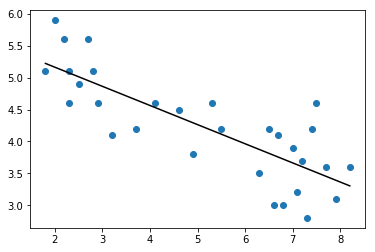

Test loss:0.031010033521481798


In [3]:
TRAIN_PATH = '5-trainingdata.txt'
TEST_PATH = '5-testdata.txt'    
a, b = linear_regression(TRAIN_PATH)
test_loss = test(TEST_PATH, a, b)
print 'Test loss:'+str(test_loss)

Test loss: 0.061697231228246885

# Huber Loss function
https://en.wikipedia.org/wiki/Huber_loss

In [3]:
def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]))
    da /= N
    return loss, da, db

# Implementation

In [26]:
import numpy as np
import matplotlib.pylab as pl
import random

def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]*np.sign(res[idx_g])))
    da /= N
    return loss, da, db

def opt(X, y, a, b, learning_rate, num_iter, sigma, browse = True):
#     a_update, b_update = 0.0, 0.0
    for i in range(num_iter):
        loss, da, db = Huber(X, y, a, b, sigma)
        #update a, b
        a -= learning_rate * da
        b -= learning_rate * db
        if browse:
            print 'iter {0}:loss={1}'.format(i,loss)
    return loss, a, b
def test_huber(TEST_PATH, a, b, sigma):
    X_test, y_test = load_data(TEST_PATH)
    loss, _, _ = Huber(X_test, y_test, a, b, sigma)
    return loss
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0], data[:,1]
    X /=10.0
    y /=100.0
    return X, y

def linear_regression_huber(PATH, sigma):
    #hyperparameter
    learning_rate = 0.001
    a_init = random.random()
    b_init = random.random()
#     sigma = 2.5
    num_iter = 50000
    print a_init, b_init
    #load data
    X, y = load_data(PATH)
    
    #train
    print 'Train start...'
    loss, a, b = opt(X, y, a_init, b_init, learning_rate, num_iter, sigma)
    print 'Result:\n a = {0}\n b = {1}\n loss = {2}\n'.format(a, b, loss)
    
    #plot
    y_p = a*X + b
    pl.plot(X, y, 'o')
    pl.plot(X, y_p, 'k-')
    pl.show()
    return a, b

0.885959142636 0.686371026436
Train start...
iter 0:loss=3.00131149111
iter 1:loss=2.96763590899
iter 2:loss=2.93447295157
iter 3:loss=2.90181409482
iter 4:loss=2.86965156022
iter 5:loss=2.83797408516
iter 6:loss=2.80676211616
iter 7:loss=2.7760121329
iter 8:loss=2.74576557502
iter 9:loss=2.7160433358
iter 10:loss=2.68683488284
iter 11:loss=2.65812400862
iter 12:loss=2.62990050726
iter 13:loss=2.60215599699
iter 14:loss=2.57488224588
iter 15:loss=2.54809164812
iter 16:loss=2.52183106163
iter 17:loss=2.49608986756
iter 18:loss=2.47085864828
iter 19:loss=2.44616596251
iter 20:loss=2.42204825909
iter 21:loss=2.39849198778
iter 22:loss=2.3754839177
iter 23:loss=2.35301229571
iter 24:loss=2.33109207396
iter 25:loss=2.30973601664
iter 26:loss=2.28892941213
iter 27:loss=2.26865857001
iter 28:loss=2.24895872127
iter 29:loss=2.22989250706
iter 30:loss=2.21143928206
iter 31:loss=2.19357907362
iter 32:loss=2.17629255989
iter 33:loss=2.15956104861
iter 34:loss=2.14336645655
iter 35:loss=2.12769128

iter 624:loss=1.63530816299
iter 625:loss=1.6351038719
iter 626:loss=1.63489960123
iter 627:loss=1.63469535097
iter 628:loss=1.63449112111
iter 629:loss=1.63428691165
iter 630:loss=1.63408272259
iter 631:loss=1.63387855393
iter 632:loss=1.63367440567
iter 633:loss=1.6334702778
iter 634:loss=1.63326617033
iter 635:loss=1.63306208325
iter 636:loss=1.63285801655
iter 637:loss=1.63265397024
iter 638:loss=1.63244994432
iter 639:loss=1.63224593877
iter 640:loss=1.63204195361
iter 641:loss=1.63183798883
iter 642:loss=1.63163404442
iter 643:loss=1.63143012039
iter 644:loss=1.63122621673
iter 645:loss=1.63102233343
iter 646:loss=1.63081847051
iter 647:loss=1.63061462795
iter 648:loss=1.63041080576
iter 649:loss=1.63020700393
iter 650:loss=1.63000322246
iter 651:loss=1.62979946135
iter 652:loss=1.62959572059
iter 653:loss=1.62939200019
iter 654:loss=1.62918830014
iter 655:loss=1.62898462043
iter 656:loss=1.62878096108
iter 657:loss=1.62857732207
iter 658:loss=1.62837370341
iter 659:loss=1.628170

iter 2654:loss=1.261339002
iter 2655:loss=1.26117519043
iter 2656:loss=1.26101140165
iter 2657:loss=1.26084763567
iter 2658:loss=1.26068389248
iter 2659:loss=1.26052017209
iter 2660:loss=1.26035647447
iter 2661:loss=1.26019279964
iter 2662:loss=1.26002914759
iter 2663:loss=1.25986551831
iter 2664:loss=1.25970191181
iter 2665:loss=1.25953832808
iter 2666:loss=1.25937476711
iter 2667:loss=1.25921122891
iter 2668:loss=1.25904771346
iter 2669:loss=1.25888422078
iter 2670:loss=1.25872075085
iter 2671:loss=1.25855730367
iter 2672:loss=1.25839387923
iter 2673:loss=1.25823047754
iter 2674:loss=1.25806709859
iter 2675:loss=1.25790374238
iter 2676:loss=1.25774040891
iter 2677:loss=1.25757709816
iter 2678:loss=1.25741381015
iter 2679:loss=1.25725054486
iter 2680:loss=1.25708730229
iter 2681:loss=1.25692408244
iter 2682:loss=1.25676088531
iter 2683:loss=1.25659771089
iter 2684:loss=1.25643455918
iter 2685:loss=1.25627143017
iter 2686:loss=1.25610832387
iter 2687:loss=1.25594524027
iter 2688:loss=1

iter 4655:loss=0.977675453149
iter 4656:loss=0.977556105619
iter 4657:loss=0.977436782456
iter 4658:loss=0.977317483656
iter 4659:loss=0.977198209211
iter 4660:loss=0.977078959116
iter 4661:loss=0.976959733365
iter 4662:loss=0.976840531953
iter 4663:loss=0.976721354874
iter 4664:loss=0.976602202123
iter 4665:loss=0.976483073693
iter 4666:loss=0.976363969579
iter 4667:loss=0.976244889777
iter 4668:loss=0.976125834279
iter 4669:loss=0.976006803082
iter 4670:loss=0.975887796179
iter 4671:loss=0.975768813565
iter 4672:loss=0.975649855235
iter 4673:loss=0.975530921183
iter 4674:loss=0.975412011405
iter 4675:loss=0.975293125894
iter 4676:loss=0.975174264645
iter 4677:loss=0.975055427655
iter 4678:loss=0.974936614916
iter 4679:loss=0.974817826424
iter 4680:loss=0.974699062173
iter 4681:loss=0.974580322159
iter 4682:loss=0.974461606377
iter 4683:loss=0.97434291482
iter 4684:loss=0.974224247485
iter 4685:loss=0.974105604365
iter 4686:loss=0.973986985456
iter 4687:loss=0.973868390753
iter 4688:l

iter 6669:loss=0.778806144118
iter 6670:loss=0.778726022185
iter 6671:loss=0.778645916488
iter 6672:loss=0.778565827021
iter 6673:loss=0.778485753783
iter 6674:loss=0.778405696769
iter 6675:loss=0.778325655977
iter 6676:loss=0.778245631402
iter 6677:loss=0.778165623043
iter 6678:loss=0.778085630895
iter 6679:loss=0.778005654955
iter 6680:loss=0.77792569522
iter 6681:loss=0.777845751687
iter 6682:loss=0.777765824352
iter 6683:loss=0.777685913212
iter 6684:loss=0.777606018264
iter 6685:loss=0.777526139505
iter 6686:loss=0.77744627693
iter 6687:loss=0.777366430538
iter 6688:loss=0.777286600325
iter 6689:loss=0.777206786287
iter 6690:loss=0.777126988421
iter 6691:loss=0.777047206723
iter 6692:loss=0.776967441192
iter 6693:loss=0.776887691823
iter 6694:loss=0.776807958613
iter 6695:loss=0.776728241558
iter 6696:loss=0.776648540656
iter 6697:loss=0.776568855903
iter 6698:loss=0.776489187297
iter 6699:loss=0.776409534833
iter 6700:loss=0.776329898508
iter 6701:loss=0.776250278319
iter 6702:lo

iter 8542:loss=0.656262456399
iter 8543:loss=0.65621073488
iter 8544:loss=0.656159026098
iter 8545:loss=0.65610733005
iter 8546:loss=0.656055646734
iter 8547:loss=0.656003976146
iter 8548:loss=0.655952318283
iter 8549:loss=0.655900673143
iter 8550:loss=0.655849040721
iter 8551:loss=0.655797421015
iter 8552:loss=0.655745814022
iter 8553:loss=0.655694219738
iter 8554:loss=0.65564263816
iter 8555:loss=0.655591069286
iter 8556:loss=0.655539513112
iter 8557:loss=0.655487969634
iter 8558:loss=0.655436438851
iter 8559:loss=0.655384920758
iter 8560:loss=0.655333415353
iter 8561:loss=0.655281922632
iter 8562:loss=0.655230442593
iter 8563:loss=0.655178975232
iter 8564:loss=0.655127520546
iter 8565:loss=0.655076078532
iter 8566:loss=0.655024649187
iter 8567:loss=0.654973232507
iter 8568:loss=0.654921828491
iter 8569:loss=0.654870437133
iter 8570:loss=0.654819058432
iter 8571:loss=0.654767692385
iter 8572:loss=0.654716338987
iter 8573:loss=0.654664998237
iter 8574:loss=0.65461367013
iter 8575:loss

iter 10226:loss=0.585202880626
iter 10227:loss=0.585169366377
iter 10228:loss=0.585135861288
iter 10229:loss=0.585102365355
iter 10230:loss=0.585068878575
iter 10231:loss=0.585035400948
iter 10232:loss=0.585001932469
iter 10233:loss=0.584968473137
iter 10234:loss=0.584935022949
iter 10235:loss=0.584901581902
iter 10236:loss=0.584868149995
iter 10237:loss=0.584834727224
iter 10238:loss=0.584801313587
iter 10239:loss=0.584767909082
iter 10240:loss=0.584734513705
iter 10241:loss=0.584701127455
iter 10242:loss=0.584667750329
iter 10243:loss=0.584634382325
iter 10244:loss=0.58460102344
iter 10245:loss=0.584567673671
iter 10246:loss=0.584534333017
iter 10247:loss=0.584501001474
iter 10248:loss=0.58446767904
iter 10249:loss=0.584434365713
iter 10250:loss=0.58440106149
iter 10251:loss=0.584367766368
iter 10252:loss=0.584334480346
iter 10253:loss=0.58430120342
iter 10254:loss=0.584267935588
iter 10255:loss=0.584234676849
iter 10256:loss=0.584201427198
iter 10257:loss=0.584168186634
iter 10258:l

iter 12181:loss=0.534438683723
iter 12182:loss=0.534419042699
iter 12183:loss=0.534399407043
iter 12184:loss=0.534379776753
iter 12185:loss=0.534360151828
iter 12186:loss=0.534340532266
iter 12187:loss=0.534320918065
iter 12188:loss=0.534301309225
iter 12189:loss=0.534281705744
iter 12190:loss=0.534262107621
iter 12191:loss=0.534242514853
iter 12192:loss=0.53422292744
iter 12193:loss=0.534203345379
iter 12194:loss=0.534183768671
iter 12195:loss=0.534164197312
iter 12196:loss=0.534144631302
iter 12197:loss=0.534125070639
iter 12198:loss=0.534105515322
iter 12199:loss=0.534085965349
iter 12200:loss=0.534066420718
iter 12201:loss=0.534046881429
iter 12202:loss=0.53402734748
iter 12203:loss=0.534007818869
iter 12204:loss=0.533988295596
iter 12205:loss=0.533968777657
iter 12206:loss=0.533949265053
iter 12207:loss=0.533929757781
iter 12208:loss=0.533910255841
iter 12209:loss=0.53389075923
iter 12210:loss=0.533871267947
iter 12211:loss=0.533851781991
iter 12212:loss=0.53383230136
iter 12213:l

iter 14143:loss=0.50460782031
iter 14144:loss=0.504596331691
iter 14145:loss=0.504584846212
iter 14146:loss=0.504573363871
iter 14147:loss=0.504561884669
iter 14148:loss=0.504550408603
iter 14149:loss=0.504538935674
iter 14150:loss=0.50452746588
iter 14151:loss=0.504515999221
iter 14152:loss=0.504504535695
iter 14153:loss=0.504493075303
iter 14154:loss=0.504481618042
iter 14155:loss=0.504470163912
iter 14156:loss=0.504458712913
iter 14157:loss=0.504447265043
iter 14158:loss=0.504435820302
iter 14159:loss=0.504424378688
iter 14160:loss=0.504412940201
iter 14161:loss=0.504401504841
iter 14162:loss=0.504390072605
iter 14163:loss=0.504378643494
iter 14164:loss=0.504367217506
iter 14165:loss=0.50435579464
iter 14166:loss=0.504344374897
iter 14167:loss=0.504332958274
iter 14168:loss=0.504321544771
iter 14169:loss=0.504310134388
iter 14170:loss=0.504298727122
iter 14171:loss=0.504287322975
iter 14172:loss=0.504275921943
iter 14173:loss=0.504264524028
iter 14174:loss=0.504253129227
iter 14175:

iter 16061:loss=0.487456368209
iter 16062:loss=0.487449566869
iter 16063:loss=0.487442767387
iter 16064:loss=0.487435969764
iter 16065:loss=0.487429173998
iter 16066:loss=0.48742238009
iter 16067:loss=0.487415588038
iter 16068:loss=0.487408797843
iter 16069:loss=0.487402009503
iter 16070:loss=0.487395223019
iter 16071:loss=0.487388438389
iter 16072:loss=0.487381655613
iter 16073:loss=0.487374874691
iter 16074:loss=0.487368095622
iter 16075:loss=0.487361318406
iter 16076:loss=0.487354543041
iter 16077:loss=0.487347769529
iter 16078:loss=0.487340997867
iter 16079:loss=0.487334228056
iter 16080:loss=0.487327460096
iter 16081:loss=0.487320693984
iter 16082:loss=0.487313929722
iter 16083:loss=0.487307167309
iter 16084:loss=0.487300406744
iter 16085:loss=0.487293648026
iter 16086:loss=0.487286891155
iter 16087:loss=0.487280136131
iter 16088:loss=0.487273382953
iter 16089:loss=0.48726663162
iter 16090:loss=0.487259882133
iter 16091:loss=0.48725313449
iter 16092:loss=0.487246388691
iter 16093:

iter 17633:loss=0.478763942331
iter 17634:loss=0.478759516523
iter 17635:loss=0.478755091924
iter 17636:loss=0.478750668535
iter 17637:loss=0.478746246354
iter 17638:loss=0.478741825382
iter 17639:loss=0.478737405618
iter 17640:loss=0.478732987063
iter 17641:loss=0.478728569714
iter 17642:loss=0.478724153573
iter 17643:loss=0.478719738639
iter 17644:loss=0.478715324911
iter 17645:loss=0.47871091239
iter 17646:loss=0.478706501074
iter 17647:loss=0.478702090964
iter 17648:loss=0.478697682059
iter 17649:loss=0.478693274359
iter 17650:loss=0.478688867864
iter 17651:loss=0.478684462573
iter 17652:loss=0.478680058485
iter 17653:loss=0.478675655602
iter 17654:loss=0.478671253921
iter 17655:loss=0.478666853444
iter 17656:loss=0.478662454169
iter 17657:loss=0.478658056096
iter 17658:loss=0.478653659226
iter 17659:loss=0.478649263557
iter 17660:loss=0.478644869089
iter 17661:loss=0.478640475822
iter 17662:loss=0.478636083756
iter 17663:loss=0.47863169289
iter 17664:loss=0.478627303224
iter 17665

iter 19556:loss=0.472143524432
iter 19557:loss=0.472140907902
iter 19558:loss=0.472138292087
iter 19559:loss=0.472135676987
iter 19560:loss=0.472133062602
iter 19561:loss=0.472130448931
iter 19562:loss=0.472127835974
iter 19563:loss=0.472125223732
iter 19564:loss=0.472122612203
iter 19565:loss=0.472120001388
iter 19566:loss=0.472117391287
iter 19567:loss=0.472114781899
iter 19568:loss=0.472112173224
iter 19569:loss=0.472109565261
iter 19570:loss=0.472106958012
iter 19571:loss=0.472104351475
iter 19572:loss=0.472101745651
iter 19573:loss=0.472099140538
iter 19574:loss=0.472096536138
iter 19575:loss=0.472093932449
iter 19576:loss=0.472091329472
iter 19577:loss=0.472088727206
iter 19578:loss=0.472086125652
iter 19579:loss=0.472083524808
iter 19580:loss=0.472080924675
iter 19581:loss=0.472078325253
iter 19582:loss=0.472075726541
iter 19583:loss=0.472073128539
iter 19584:loss=0.472070531248
iter 19585:loss=0.472067934666
iter 19586:loss=0.472065338794
iter 19587:loss=0.472062743631
iter 195

iter 21124:loss=0.46880629383
iter 21125:loss=0.468804589324
iter 21126:loss=0.468802885284
iter 21127:loss=0.468801181709
iter 21128:loss=0.4687994786
iter 21129:loss=0.468797775956
iter 21130:loss=0.468796073777
iter 21131:loss=0.468794372064
iter 21132:loss=0.468792670816
iter 21133:loss=0.468790970032
iter 21134:loss=0.468789269714
iter 21135:loss=0.46878756986
iter 21136:loss=0.468785870471
iter 21137:loss=0.468784171546
iter 21138:loss=0.468782473085
iter 21139:loss=0.468780775089
iter 21140:loss=0.468779077557
iter 21141:loss=0.468777380488
iter 21142:loss=0.468775683884
iter 21143:loss=0.468773987743
iter 21144:loss=0.468772292065
iter 21145:loss=0.468770596851
iter 21146:loss=0.4687689021
iter 21147:loss=0.468767207813
iter 21148:loss=0.468765513988
iter 21149:loss=0.468763820626
iter 21150:loss=0.468762127728
iter 21151:loss=0.468760435291
iter 21152:loss=0.468758743318
iter 21153:loss=0.468757051806
iter 21154:loss=0.468755360757
iter 21155:loss=0.46875367017
iter 21156:loss

iter 23053:loss=0.466250537902
iter 23054:loss=0.466249531852
iter 23055:loss=0.466248526077
iter 23056:loss=0.466247520576
iter 23057:loss=0.466246515351
iter 23058:loss=0.466245510401
iter 23059:loss=0.466244505725
iter 23060:loss=0.466243501323
iter 23061:loss=0.466242497196
iter 23062:loss=0.466241493344
iter 23063:loss=0.466240489765
iter 23064:loss=0.466239486462
iter 23065:loss=0.466238483432
iter 23066:loss=0.466237480676
iter 23067:loss=0.466236478195
iter 23068:loss=0.466235475987
iter 23069:loss=0.466234474053
iter 23070:loss=0.466233472394
iter 23071:loss=0.466232471007
iter 23072:loss=0.466231469895
iter 23073:loss=0.466230469056
iter 23074:loss=0.466229468491
iter 23075:loss=0.466228468199
iter 23076:loss=0.46622746818
iter 23077:loss=0.466226468435
iter 23078:loss=0.466225468963
iter 23079:loss=0.466224469764
iter 23080:loss=0.466223470838
iter 23081:loss=0.466222472185
iter 23082:loss=0.466221473805
iter 23083:loss=0.466220475698
iter 23084:loss=0.466219477864
iter 2308

iter 24617:loss=0.464970003506
iter 24618:loss=0.46496934741
iter 24619:loss=0.464968691494
iter 24620:loss=0.464968035757
iter 24621:loss=0.464967380199
iter 24622:loss=0.46496672482
iter 24623:loss=0.46496606962
iter 24624:loss=0.464965414599
iter 24625:loss=0.464964759758
iter 24626:loss=0.464964105095
iter 24627:loss=0.464963450611
iter 24628:loss=0.464962796306
iter 24629:loss=0.46496214218
iter 24630:loss=0.464961488232
iter 24631:loss=0.464960834464
iter 24632:loss=0.464960180874
iter 24633:loss=0.464959527462
iter 24634:loss=0.46495887423
iter 24635:loss=0.464958221175
iter 24636:loss=0.4649575683
iter 24637:loss=0.464956915602
iter 24638:loss=0.464956263083
iter 24639:loss=0.464955610742
iter 24640:loss=0.46495495858
iter 24641:loss=0.464954306596
iter 24642:loss=0.46495365479
iter 24643:loss=0.464953003162
iter 24644:loss=0.464952351712
iter 24645:loss=0.46495170044
iter 24646:loss=0.464951049347
iter 24647:loss=0.464950398431
iter 24648:loss=0.464949747693
iter 24649:loss=0.

iter 26539:loss=0.463988959809
iter 26540:loss=0.46398857182
iter 26541:loss=0.463988183937
iter 26542:loss=0.46398779616
iter 26543:loss=0.46398740849
iter 26544:loss=0.463987020925
iter 26545:loss=0.463986633466
iter 26546:loss=0.463986246113
iter 26547:loss=0.463985858866
iter 26548:loss=0.463985471725
iter 26549:loss=0.463985084689
iter 26550:loss=0.46398469776
iter 26551:loss=0.463984310936
iter 26552:loss=0.463983924217
iter 26553:loss=0.463983537605
iter 26554:loss=0.463983151098
iter 26555:loss=0.463982764697
iter 26556:loss=0.463982378401
iter 26557:loss=0.463981992211
iter 26558:loss=0.463981606126
iter 26559:loss=0.463981220147
iter 26560:loss=0.463980834274
iter 26561:loss=0.463980448506
iter 26562:loss=0.463980062843
iter 26563:loss=0.463979677286
iter 26564:loss=0.463979291834
iter 26565:loss=0.463978906487
iter 26566:loss=0.463978521246
iter 26567:loss=0.46397813611
iter 26568:loss=0.463977751079
iter 26569:loss=0.463977366154
iter 26570:loss=0.463976981333
iter 26571:lo

iter 28100:loss=0.463495874141
iter 28101:loss=0.463495620906
iter 28102:loss=0.463495367741
iter 28103:loss=0.463495114645
iter 28104:loss=0.463494861618
iter 28105:loss=0.46349460866
iter 28106:loss=0.463494355771
iter 28107:loss=0.463494102952
iter 28108:loss=0.463493850201
iter 28109:loss=0.46349359752
iter 28110:loss=0.463493344908
iter 28111:loss=0.463493092364
iter 28112:loss=0.46349283989
iter 28113:loss=0.463492587485
iter 28114:loss=0.463492335148
iter 28115:loss=0.463492082881
iter 28116:loss=0.463491830683
iter 28117:loss=0.463491578553
iter 28118:loss=0.463491326493
iter 28119:loss=0.463491074501
iter 28120:loss=0.463490822578
iter 28121:loss=0.463490570724
iter 28122:loss=0.463490318939
iter 28123:loss=0.463490067222
iter 28124:loss=0.463489815575
iter 28125:loss=0.463489563996
iter 28126:loss=0.463489312486
iter 28127:loss=0.463489061045
iter 28128:loss=0.463488809672
iter 28129:loss=0.463488558368
iter 28130:loss=0.463488307133
iter 28131:loss=0.463488055967
iter 28132:

iter 30031:loss=0.463115872557
iter 30032:loss=0.463115723172
iter 30033:loss=0.463115573828
iter 30034:loss=0.463115424525
iter 30035:loss=0.463115275262
iter 30036:loss=0.463115126041
iter 30037:loss=0.46311497686
iter 30038:loss=0.46311482772
iter 30039:loss=0.463114678621
iter 30040:loss=0.463114529562
iter 30041:loss=0.463114380544
iter 30042:loss=0.463114231567
iter 30043:loss=0.463114082631
iter 30044:loss=0.463113933735
iter 30045:loss=0.46311378488
iter 30046:loss=0.463113636066
iter 30047:loss=0.463113487292
iter 30048:loss=0.46311333856
iter 30049:loss=0.463113189867
iter 30050:loss=0.463113041216
iter 30051:loss=0.463112892605
iter 30052:loss=0.463112744034
iter 30053:loss=0.463112595504
iter 30054:loss=0.463112447015
iter 30055:loss=0.463112298566
iter 30056:loss=0.463112150158
iter 30057:loss=0.463112001791
iter 30058:loss=0.463111853464
iter 30059:loss=0.463111705177
iter 30060:loss=0.463111556931
iter 30061:loss=0.463111408726
iter 30062:loss=0.463111260561
iter 30063:l

iter 31581:loss=0.462927097219
iter 31582:loss=0.462926999424
iter 31583:loss=0.462926901656
iter 31584:loss=0.462926803914
iter 31585:loss=0.4629267062
iter 31586:loss=0.462926608512
iter 31587:loss=0.46292651085
iter 31588:loss=0.462926413216
iter 31589:loss=0.462926315608
iter 31590:loss=0.462926218027
iter 31591:loss=0.462926120472
iter 31592:loss=0.462926022944
iter 31593:loss=0.462925925443
iter 31594:loss=0.462925827968
iter 31595:loss=0.46292573052
iter 31596:loss=0.462925633099
iter 31597:loss=0.462925535704
iter 31598:loss=0.462925438336
iter 31599:loss=0.462925340995
iter 31600:loss=0.46292524368
iter 31601:loss=0.462925146391
iter 31602:loss=0.46292504913
iter 31603:loss=0.462924951895
iter 31604:loss=0.462924854686
iter 31605:loss=0.462924757504
iter 31606:loss=0.462924660349
iter 31607:loss=0.46292456322
iter 31608:loss=0.462924466117
iter 31609:loss=0.462924369042
iter 31610:loss=0.462924271992
iter 31611:loss=0.46292417497
iter 31612:loss=0.462924077973
iter 31613:loss=

iter 33213:loss=0.462798323259
iter 33214:loss=0.462798260657
iter 33215:loss=0.462798198071
iter 33216:loss=0.462798135503
iter 33217:loss=0.462798072952
iter 33218:loss=0.462798010418
iter 33219:loss=0.462797947901
iter 33220:loss=0.462797885401
iter 33221:loss=0.462797822918
iter 33222:loss=0.462797760452
iter 33223:loss=0.462797698003
iter 33224:loss=0.462797635572
iter 33225:loss=0.462797573157
iter 33226:loss=0.46279751076
iter 33227:loss=0.462797448379
iter 33228:loss=0.462797386016
iter 33229:loss=0.462797323669
iter 33230:loss=0.46279726134
iter 33231:loss=0.462797199028
iter 33232:loss=0.462797136732
iter 33233:loss=0.462797074454
iter 33234:loss=0.462797012193
iter 33235:loss=0.462796949949
iter 33236:loss=0.462796887721
iter 33237:loss=0.462796825511
iter 33238:loss=0.462796763318
iter 33239:loss=0.462796701142
iter 33240:loss=0.462796638983
iter 33241:loss=0.46279657684
iter 33242:loss=0.462796514715
iter 33243:loss=0.462796452607
iter 33244:loss=0.462796390515
iter 33245:

iter 35074:loss=0.46270699276
iter 35075:loss=0.462706955117
iter 35076:loss=0.462706917484
iter 35077:loss=0.462706879862
iter 35078:loss=0.46270684225
iter 35079:loss=0.462706804648
iter 35080:loss=0.462706767056
iter 35081:loss=0.462706729475
iter 35082:loss=0.462706691904
iter 35083:loss=0.462706654343
iter 35084:loss=0.462706616792
iter 35085:loss=0.462706579252
iter 35086:loss=0.462706541722
iter 35087:loss=0.462706504202
iter 35088:loss=0.462706466693
iter 35089:loss=0.462706429194
iter 35090:loss=0.462706391705
iter 35091:loss=0.462706354226
iter 35092:loss=0.462706316757
iter 35093:loss=0.462706279299
iter 35094:loss=0.462706241851
iter 35095:loss=0.462706204413
iter 35096:loss=0.462706166986
iter 35097:loss=0.462706129568
iter 35098:loss=0.462706092161
iter 35099:loss=0.462706054764
iter 35100:loss=0.462706017377
iter 35101:loss=0.462705980001
iter 35102:loss=0.462705942635
iter 35103:loss=0.462705905279
iter 35104:loss=0.462705867933
iter 35105:loss=0.462705830597
iter 35106

iter 36696:loss=0.462657666629
iter 36697:loss=0.462657642467
iter 36698:loss=0.46265761831
iter 36699:loss=0.462657594161
iter 36700:loss=0.462657570018
iter 36701:loss=0.462657545881
iter 36702:loss=0.462657521752
iter 36703:loss=0.462657497628
iter 36704:loss=0.462657473512
iter 36705:loss=0.462657449402
iter 36706:loss=0.462657425298
iter 36707:loss=0.462657401201
iter 36708:loss=0.462657377111
iter 36709:loss=0.462657353027
iter 36710:loss=0.46265732895
iter 36711:loss=0.46265730488
iter 36712:loss=0.462657280816
iter 36713:loss=0.462657256758
iter 36714:loss=0.462657232708
iter 36715:loss=0.462657208663
iter 36716:loss=0.462657184626
iter 36717:loss=0.462657160595
iter 36718:loss=0.46265713657
iter 36719:loss=0.462657112552
iter 36720:loss=0.462657088541
iter 36721:loss=0.462657064536
iter 36722:loss=0.462657040538
iter 36723:loss=0.462657016546
iter 36724:loss=0.462656992561
iter 36725:loss=0.462656968582
iter 36726:loss=0.46265694461
iter 36727:loss=0.462656920645
iter 36728:lo

iter 38572:loss=0.462622198104
iter 38573:loss=0.462622183634
iter 38574:loss=0.462622169169
iter 38575:loss=0.462622154707
iter 38576:loss=0.462622140249
iter 38577:loss=0.462622125795
iter 38578:loss=0.462622111345
iter 38579:loss=0.462622096899
iter 38580:loss=0.462622082457
iter 38581:loss=0.462622068019
iter 38582:loss=0.462622053585
iter 38583:loss=0.462622039155
iter 38584:loss=0.462622024728
iter 38585:loss=0.462622010306
iter 38586:loss=0.462621995888
iter 38587:loss=0.462621981473
iter 38588:loss=0.462621967063
iter 38589:loss=0.462621952656
iter 38590:loss=0.462621938253
iter 38591:loss=0.462621923855
iter 38592:loss=0.46262190946
iter 38593:loss=0.462621895069
iter 38594:loss=0.462621880682
iter 38595:loss=0.462621866299
iter 38596:loss=0.46262185192
iter 38597:loss=0.462621837545
iter 38598:loss=0.462621823174
iter 38599:loss=0.462621808807
iter 38600:loss=0.462621794443
iter 38601:loss=0.462621780084
iter 38602:loss=0.462621765729
iter 38603:loss=0.462621751377
iter 38604

iter 40161:loss=0.462603545433
iter 40162:loss=0.462603536061
iter 40163:loss=0.462603526691
iter 40164:loss=0.462603517324
iter 40165:loss=0.46260350796
iter 40166:loss=0.462603498598
iter 40167:loss=0.462603489238
iter 40168:loss=0.462603479882
iter 40169:loss=0.462603470527
iter 40170:loss=0.462603461176
iter 40171:loss=0.462603451827
iter 40172:loss=0.46260344248
iter 40173:loss=0.462603433136
iter 40174:loss=0.462603423794
iter 40175:loss=0.462603414456
iter 40176:loss=0.462603405119
iter 40177:loss=0.462603395785
iter 40178:loss=0.462603386454
iter 40179:loss=0.462603377125
iter 40180:loss=0.462603367799
iter 40181:loss=0.462603358476
iter 40182:loss=0.462603349155
iter 40183:loss=0.462603339836
iter 40184:loss=0.46260333052
iter 40185:loss=0.462603321207
iter 40186:loss=0.462603311896
iter 40187:loss=0.462603302587
iter 40188:loss=0.462603293282
iter 40189:loss=0.462603283978
iter 40190:loss=0.462603274678
iter 40191:loss=0.462603265379
iter 40192:loss=0.462603256084
iter 40193:

iter 41713:loss=0.462591689702
iter 41714:loss=0.462591683569
iter 41715:loss=0.462591677439
iter 41716:loss=0.46259167131
iter 41717:loss=0.462591665183
iter 41718:loss=0.462591659058
iter 41719:loss=0.462591652934
iter 41720:loss=0.462591646812
iter 41721:loss=0.462591640691
iter 41722:loss=0.462591634573
iter 41723:loss=0.462591628455
iter 41724:loss=0.46259162234
iter 41725:loss=0.462591616226
iter 41726:loss=0.462591610114
iter 41727:loss=0.462591604004
iter 41728:loss=0.462591597895
iter 41729:loss=0.462591591788
iter 41730:loss=0.462591585683
iter 41731:loss=0.462591579579
iter 41732:loss=0.462591573477
iter 41733:loss=0.462591567377
iter 41734:loss=0.462591561278
iter 41735:loss=0.462591555181
iter 41736:loss=0.462591549086
iter 41737:loss=0.462591542992
iter 41738:loss=0.4625915369
iter 41739:loss=0.462591530809
iter 41740:loss=0.462591524721
iter 41741:loss=0.462591518634
iter 41742:loss=0.462591512548
iter 41743:loss=0.462591506464
iter 41744:loss=0.462591500382
iter 41745:l

iter 43580:loss=0.462582721447
iter 43581:loss=0.462582717766
iter 43582:loss=0.462582714086
iter 43583:loss=0.462582710406
iter 43584:loss=0.462582706728
iter 43585:loss=0.462582703051
iter 43586:loss=0.462582699375
iter 43587:loss=0.4625826957
iter 43588:loss=0.462582692025
iter 43589:loss=0.462582688352
iter 43590:loss=0.46258268468
iter 43591:loss=0.462582681009
iter 43592:loss=0.462582677339
iter 43593:loss=0.46258267367
iter 43594:loss=0.462582670001
iter 43595:loss=0.462582666334
iter 43596:loss=0.462582662668
iter 43597:loss=0.462582659003
iter 43598:loss=0.462582655339
iter 43599:loss=0.462582651676
iter 43600:loss=0.462582648013
iter 43601:loss=0.462582644352
iter 43602:loss=0.462582640692
iter 43603:loss=0.462582637033
iter 43604:loss=0.462582633375
iter 43605:loss=0.462582629718
iter 43606:loss=0.462582626061
iter 43607:loss=0.462582622406
iter 43608:loss=0.462582618752
iter 43609:loss=0.462582615099
iter 43610:loss=0.462582611447
iter 43611:loss=0.462582607796
iter 43612:l

iter 45300:loss=0.462577669168
iter 45301:loss=0.462577666868
iter 45302:loss=0.462577664568
iter 45303:loss=0.462577662269
iter 45304:loss=0.46257765997
iter 45305:loss=0.462577657672
iter 45306:loss=0.462577655375
iter 45307:loss=0.462577653078
iter 45308:loss=0.462577650782
iter 45309:loss=0.462577648486
iter 45310:loss=0.462577646191
iter 45311:loss=0.462577643897
iter 45312:loss=0.462577641604
iter 45313:loss=0.462577639311
iter 45314:loss=0.462577637018
iter 45315:loss=0.462577634727
iter 45316:loss=0.462577632435
iter 45317:loss=0.462577630145
iter 45318:loss=0.462577627855
iter 45319:loss=0.462577625566
iter 45320:loss=0.462577623277
iter 45321:loss=0.462577620989
iter 45322:loss=0.462577618702
iter 45323:loss=0.462577616415
iter 45324:loss=0.462577614129
iter 45325:loss=0.462577611844
iter 45326:loss=0.462577609559
iter 45327:loss=0.462577607275
iter 45328:loss=0.462577604991
iter 45329:loss=0.462577602708
iter 45330:loss=0.462577600426
iter 45331:loss=0.462577598144
iter 4533

iter 47068:loss=0.462574443292
iter 47069:loss=0.462574441873
iter 47070:loss=0.462574440455
iter 47071:loss=0.462574439036
iter 47072:loss=0.462574437619
iter 47073:loss=0.462574436201
iter 47074:loss=0.462574434784
iter 47075:loss=0.462574433368
iter 47076:loss=0.462574431952
iter 47077:loss=0.462574430536
iter 47078:loss=0.46257442912
iter 47079:loss=0.462574427705
iter 47080:loss=0.462574426291
iter 47081:loss=0.462574424876
iter 47082:loss=0.462574423462
iter 47083:loss=0.462574422049
iter 47084:loss=0.462574420636
iter 47085:loss=0.462574419223
iter 47086:loss=0.462574417811
iter 47087:loss=0.462574416399
iter 47088:loss=0.462574414987
iter 47089:loss=0.462574413576
iter 47090:loss=0.462574412165
iter 47091:loss=0.462574410755
iter 47092:loss=0.462574409345
iter 47093:loss=0.462574407935
iter 47094:loss=0.462574406526
iter 47095:loss=0.462574405117
iter 47096:loss=0.462574403709
iter 47097:loss=0.462574402301
iter 47098:loss=0.462574400893
iter 47099:loss=0.462574399486
iter 4710

iter 48676:loss=0.462572596779
iter 48677:loss=0.462572595865
iter 48678:loss=0.462572594951
iter 48679:loss=0.462572594037
iter 48680:loss=0.462572593124
iter 48681:loss=0.46257259221
iter 48682:loss=0.462572591297
iter 48683:loss=0.462572590384
iter 48684:loss=0.462572589472
iter 48685:loss=0.46257258856
iter 48686:loss=0.462572587648
iter 48687:loss=0.462572586736
iter 48688:loss=0.462572585824
iter 48689:loss=0.462572584913
iter 48690:loss=0.462572584002
iter 48691:loss=0.462572583091
iter 48692:loss=0.462572582181
iter 48693:loss=0.46257258127
iter 48694:loss=0.46257258036
iter 48695:loss=0.462572579451
iter 48696:loss=0.462572578541
iter 48697:loss=0.462572577632
iter 48698:loss=0.462572576723
iter 48699:loss=0.462572575814
iter 48700:loss=0.462572574905
iter 48701:loss=0.462572573997
iter 48702:loss=0.462572573089
iter 48703:loss=0.462572572181
iter 48704:loss=0.462572571274
iter 48705:loss=0.462572570366
iter 48706:loss=0.462572569459
iter 48707:loss=0.462572568552
iter 48708:l

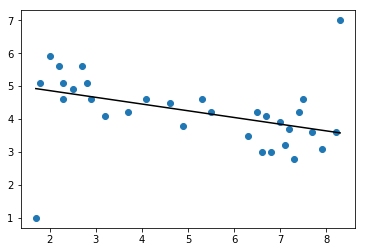

Test loss:0.08336623884690787


In [27]:
TRAIN_PATH = '5-trainingdata.txt'
TEST_PATH = '5-testdata.txt'
sigma = 2
a, b = linear_regression_huber(TRAIN_PATH, sigma)
test_loss = test_huber(TEST_PATH, a, b, sigma)
print 'Test loss:'+str(test_loss)

In [20]:
def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss
def test_old(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
test_loss_old = test_old(TEST_PATH, a, b)
print 'a = '+str(a)
print 'b = '+str(b)
print 'old way loss: '+str(test_loss_old)

a = -0.2037756360776115
b = 5.271786833446491
old way loss: 0.08333359874471885


# Conclusion

After train with Huber function
# Using original method calculate loss is 0.14695543848689624.
# While, Huber loss is 0.08336623884690787